## Analysis of Inertial Mesurment Data for Real-Time Gait Kinematics


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import math

## Preprocessing Data
I will start by deleting the unnecessary columns and changing the names of the columns.
Firstly we import the data:

In [3]:
def process_acc_files(root_folder):
    acc_files = []

    # Walk through the directory structure
    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            # Check if the file has a .acc extension
            if filename.endswith('.acc'):
                # Build the full path to the file
                file_path = os.path.join(foldername, filename)
                acc_files.append(file_path)

    return acc_files


def acc_to_df(acc_files):
    df_array = []
    for acc_file in acc_files:
       df_array.append(pd.read_csv(acc_file, sep=';'))
    return df_array

anna = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Anna_2021-10-17'))
brynhild = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Brynhild_2021-10-16'))
celine = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Celine_2021-10-16'))
frida = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Frida_2021-10-18'))
hakon = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Håkon_2021-10-17'))
lena = acc_to_df(process_acc_files('/Users/renkasik/Desktop/thesis/RENK_project/Lena_2021-10-18'))

anna

[       2021-10-17T12:43:47.058682     0  0.1  6  0.2  12258304  0.312  -5.840  \
 0      2021-10-17T12:43:47.068755     0    0  6    0  12258560  0.345  -5.866   
 1      2021-10-17T12:43:47.078829     0    1  6    0  12258816  0.352  -5.891   
 2      2021-10-17T12:43:47.088902     0    2  6    0  12259072  0.386  -5.951   
 3      2021-10-17T12:43:47.098976     0    2  6    0  12259328  0.423  -5.950   
 4      2021-10-17T12:43:47.109050     0    4  6    0  12259584  0.420  -5.985   
 ...                           ...   ...  ... ..  ...       ...    ...     ...   
 16240  2021-10-17T12:46:30.878047  1666    4  6    0  16416000 -0.434  -5.989   
 16241  2021-10-17T12:46:30.888142  1666    4  6    0  16416256 -0.410  -5.947   
 16242  2021-10-17T12:46:30.898187  1666    6  6    0  16416512 -0.390  -5.887   
 16243  2021-10-17T12:46:30.908303  1666    6  6    0  16416768 -0.381  -5.882   
 16244  2021-10-17T12:46:30.918370  1666    7  6    0  16417024 -0.374  -5.853   
 
        7.916 

**changing column names & deleting unnecessary columns**

In [4]:
def format_column_names(df):
    column_names = ['Date/Time', '1', '2', '3', '4', '5', '6', 'acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y', 'gyro_z', 'magne_x', 'magne_y', 'magne_z']
    df.columns = column_names

def delete_unnecessary_columns(df):
    columns_to_delete = ['1', '2', '3', '4', '5', '6']
    df.drop(columns=columns_to_delete, axis=1, inplace=True)


for df in anna:
    format_column_names(df)
    delete_unnecessary_columns(df)

for df in brynhild:
    format_column_names(df)
    delete_unnecessary_columns(df)

for df in celine:
    format_column_names(df)
    delete_unnecessary_columns(df)

for df in frida:
    format_column_names(df)
    delete_unnecessary_columns(df)

for df in hakon:
    format_column_names(df)
    delete_unnecessary_columns(df)

for df in lena:
    format_column_names(df)
    delete_unnecessary_columns(df)

anna[0]

,Date/Time,acce_x,acce_y,acce_z,gyro_x,gyro_y,gyro_z,magne_x,magne_y,magne_z
0,2021-10-17T12:43:47.068755,-5.866,7.934,-7.141,1.587,-4.944,5.188,-4.562,7.938,65485
1,2021-10-17T12:43:47.078829,-5.891,7.928,-7.019,1.038,-4.822,5.188,-4.562,7.938,65485
2,2021-10-17T12:43:47.088902,-5.951,7.928,-6.836,0.671,-4.944,5.188,-4.562,7.938,65485
3,2021-10-17T12:43:47.098976,-5.950,7.858,-6.775,0.244,-4.822,4.625,-3.938,7.375,65485
4,2021-10-17T12:43:47.109050,-5.985,7.876,-6.287,0.122,-4.517,4.625,-3.938,7.375,65485
...,...,...,...,...,...,...,...,...,...,...
16240,2021-10-17T12:46:30.878047,-5.989,7.967,3.113,10.987,-15.442,4.750,-4.938,7.750,65463
16241,2021-10-17T12:46:30.888142,-5.947,8.010,3.174,10.865,-15.564,4.750,-4.938,7.750,65463
16242,2021-10-17T12:46:30.898187,-5.887,7.942,2.869,10.498,-15.442,4.750,-4.938,7.750,65463
16243,2021-10-17T12:46:30.908303,-5.882,7.937,2.991,10.437,-15.076,4.812,-4.438,7.625,65464


**sliding window averaging**

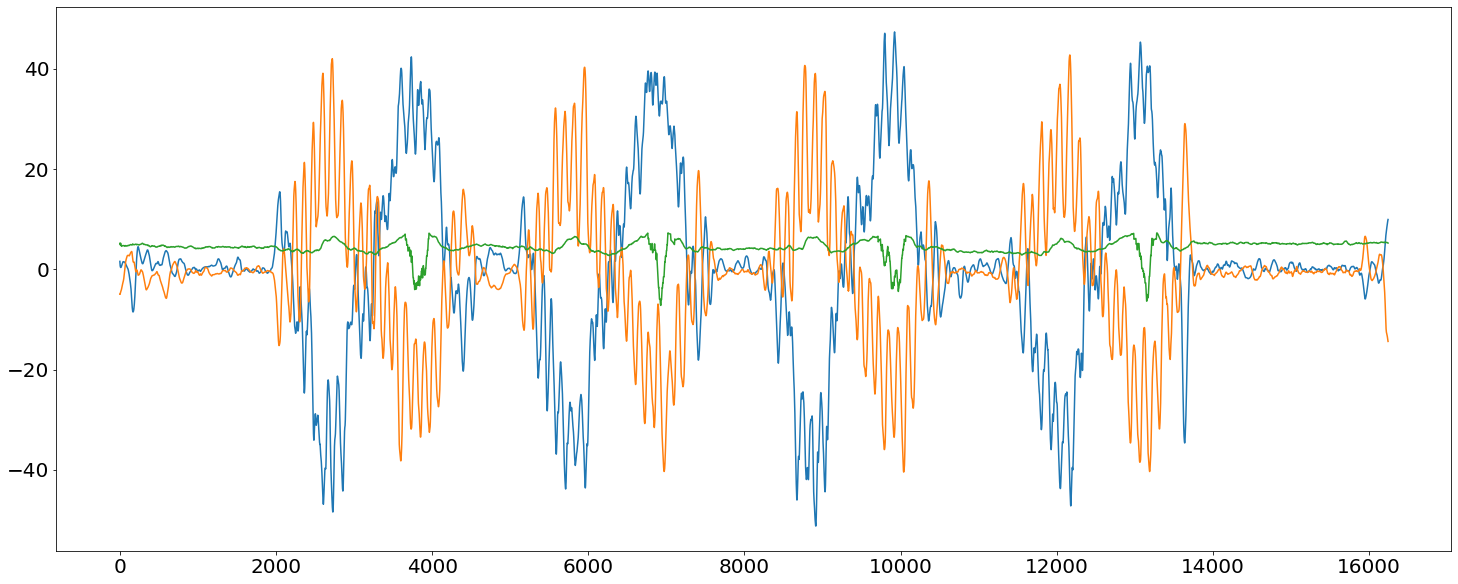

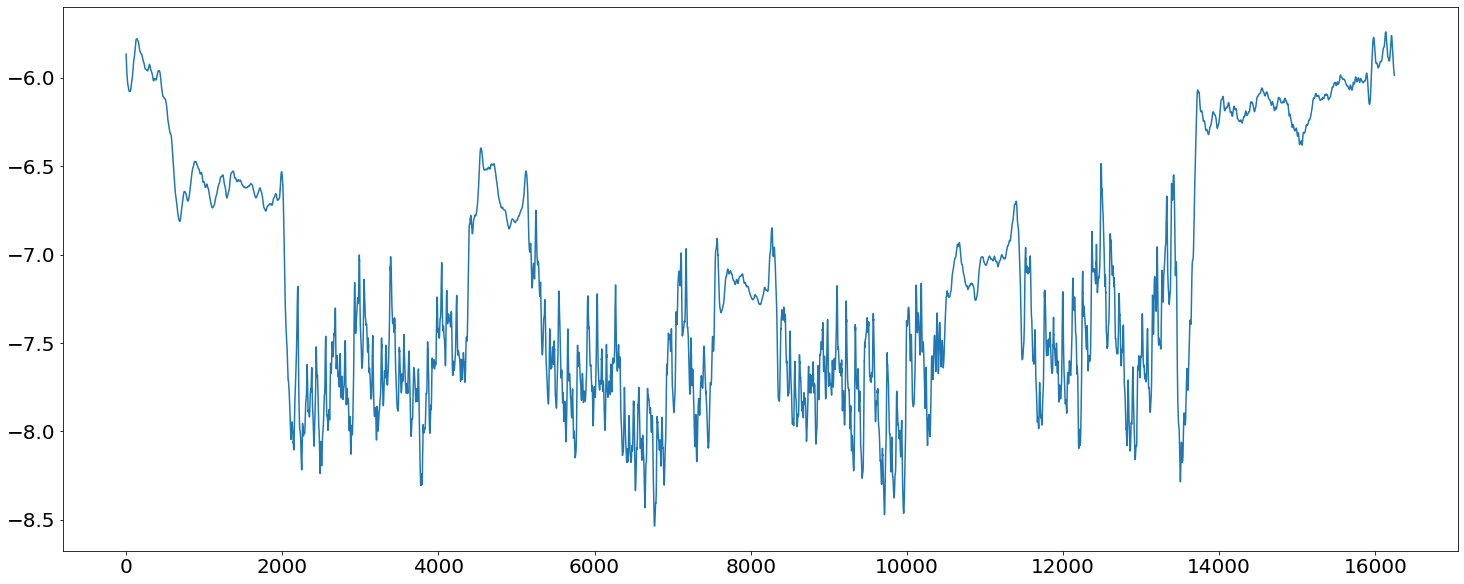

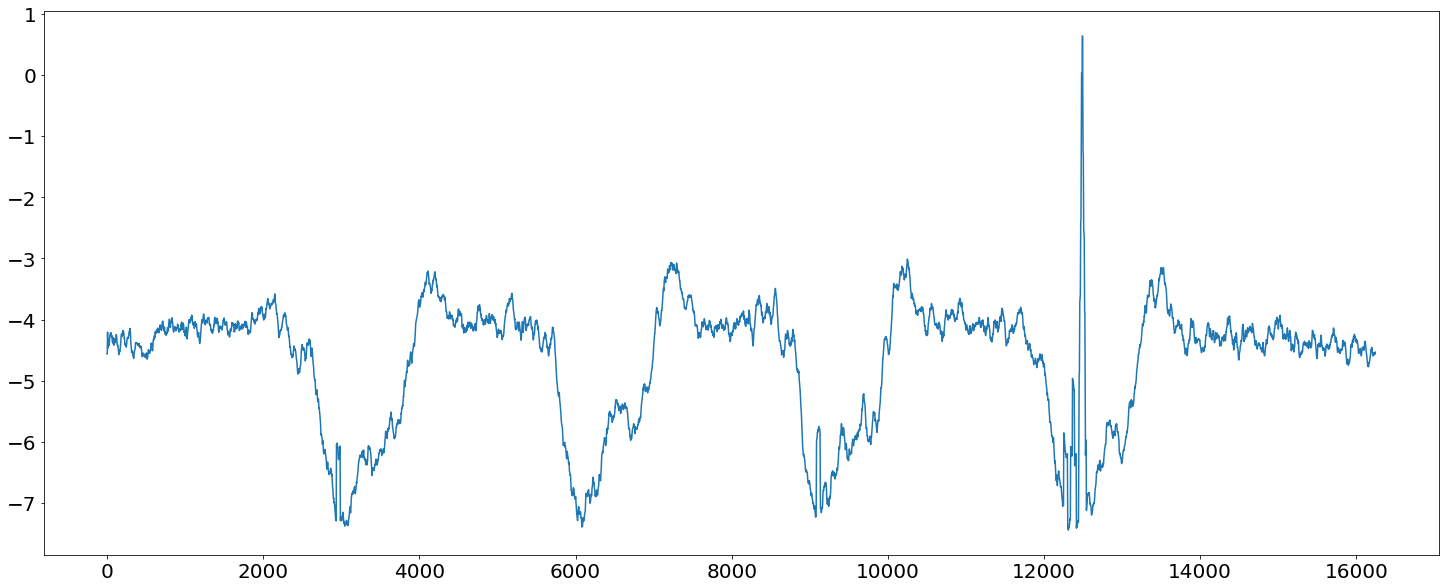

In [5]:
def sliding_window_averaging(df_list, window_size):
    averaged_df_list = []
    for df in df_list:
        averaged_df = df.copy()
        averaged_df.iloc[:, 1:] = df.iloc[:, 1:].rolling(window=window_size, min_periods=1).mean()
        averaged_df_list.append(averaged_df)
    return averaged_df_list
anna_averaged = sliding_window_averaging(anna, 50)
brynhild_averaged = sliding_window_averaging(brynhild, 50)
celine_averaged = sliding_window_averaging(celine, 50)
frida_averaged = sliding_window_averaging(frida, 50)
hakon_averaged = sliding_window_averaging(hakon, 50)
lena_averaged = sliding_window_averaging(lena, 50)


mpl.rcParams.update({'font.size': 20})

plt.figure(figsize=(25,10))
plt.plot(anna_averaged[0]['gyro_x'], label = 'Barefoot')
plt.plot(anna_averaged[0]['gyro_y'])
plt.plot(anna_averaged[0]['gyro_z'])


plt.figure(figsize=(25,10))
plt.plot(anna_averaged[0]['acce_x'], label = 'Barefoot')
#plt.plot(anna_averaged[0]['acce_y'])

plt.figure(figsize=(25,10))
plt.plot(anna_averaged[0]['magne_x'], label = 'Barefoot')


**overlapping filtered and unfiltered graphs**

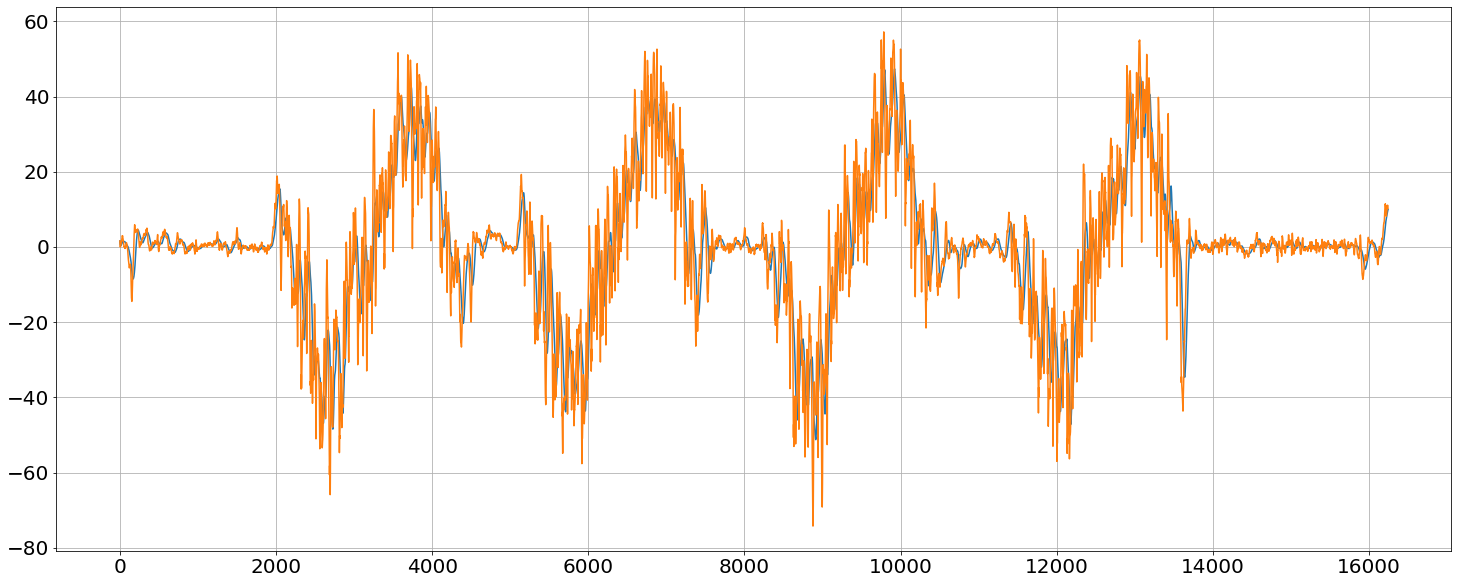

In [6]:
mpl.rcParams.update({'font.size': 20})
plt.figure(figsize=(25,10))
plt.plot(anna_averaged[0]['gyro_x'], label = 'Barefoot')
plt.plot(anna[0]['gyro_x'])
plt.grid(True)

**Average df**

In [7]:
df_list_barefoot = [anna_averaged[0],brynhild_averaged[0],celine_averaged[0],frida_averaged[0],hakon_averaged[0],lena_averaged[0]]

gyro_x_list_barefoot = [df['gyro_x'] for df in df_list_barefoot]

combined_df_barefoot = pd.concat(gyro_x_list_barefoot, axis=1)
average_gyro_barefoot = combined_df_barefoot.mean(axis=1)

average_df_barefoot = pd.DataFrame({'average_gyro_x': average_gyro_barefoot})

df_list_own = [anna_averaged[3],brynhild_averaged[5],celine_averaged[3],frida_averaged[3],hakon_averaged[3],lena_averaged[4]]

gyro_x_list_own = [df['gyro_x'] for df in df_list_own]

combined_df_own = pd.concat(gyro_x_list_own, axis=1)
average_gyro_own = combined_df_own.mean(axis=1)

average_df_own = pd.DataFrame({'average_gyro_x': average_gyro_own})

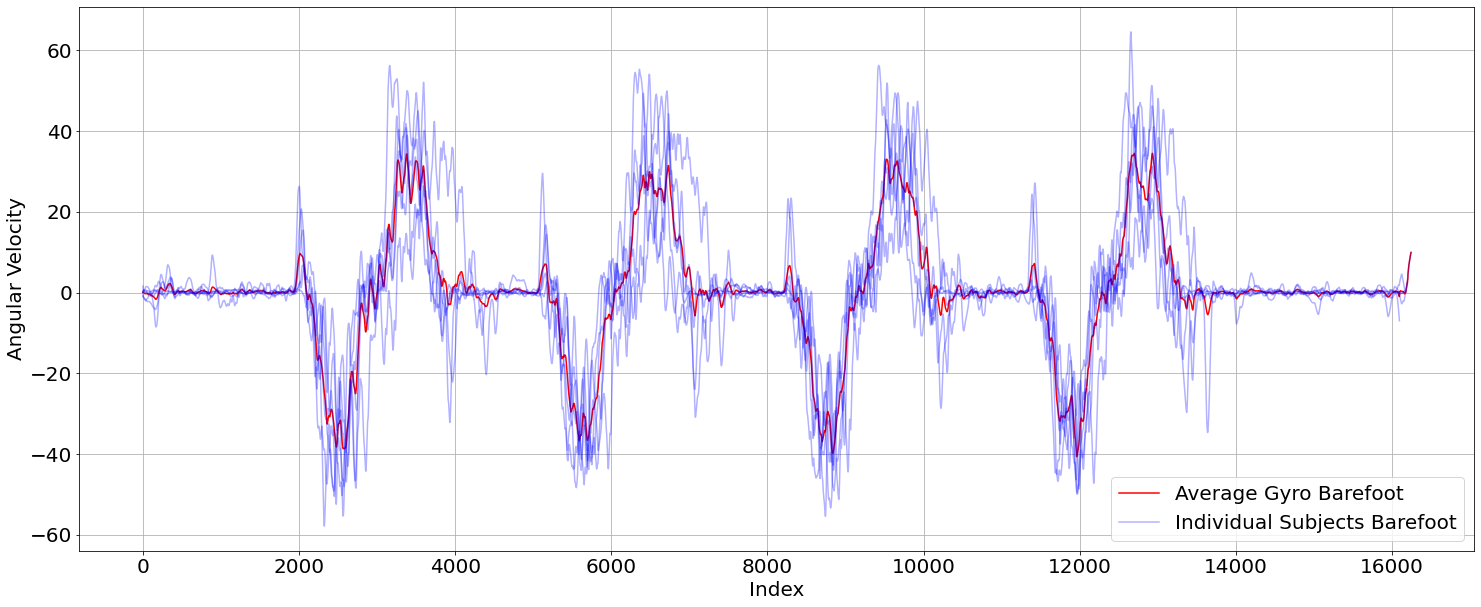

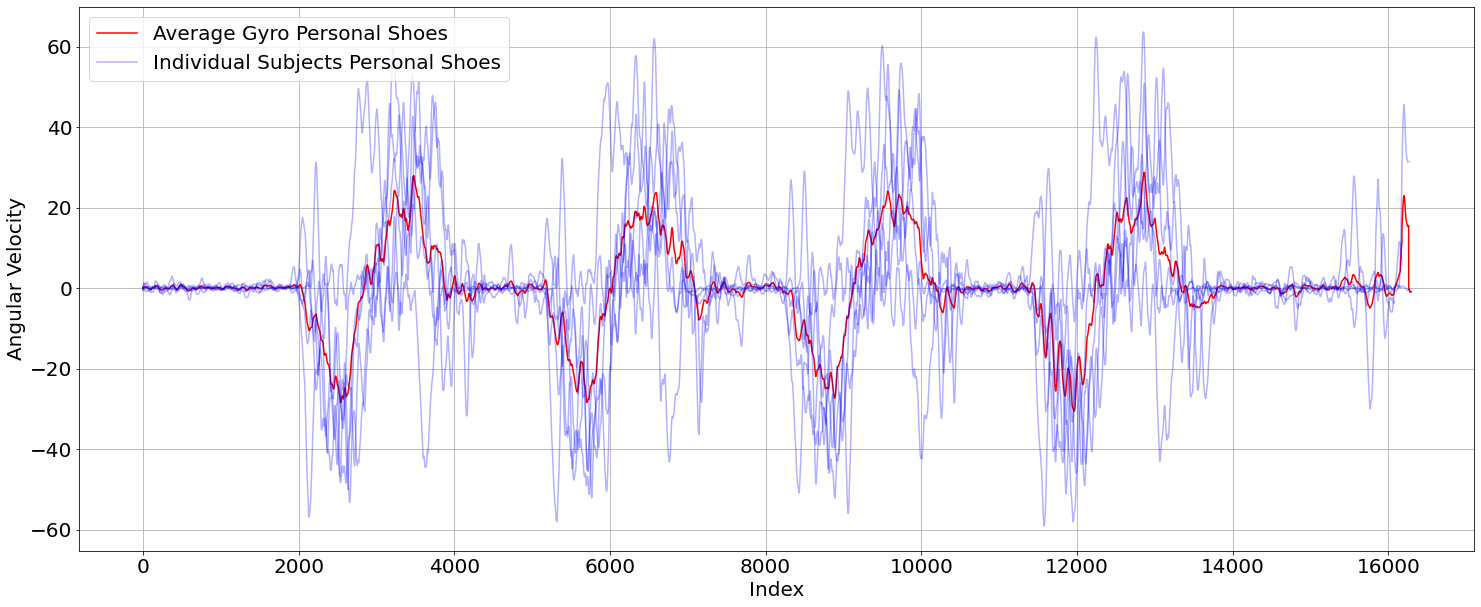

In [8]:
mpl.rcParams.update({'font.size': 20})

plt.figure(figsize=(25,10))
plt.plot(average_df_barefoot.index, average_df_barefoot['average_gyro_x'], color='red', alpha= 1.0, label='Average Gyro Barefoot')
plt.plot(anna_averaged[0]['gyro_x'], alpha=0.3, color='blue', label = 'Individual Subjects Barefoot')
plt.plot(brynhild_averaged[0]['gyro_x'], alpha=0.3, color='blue')
plt.plot(celine_averaged[0]['gyro_x'], alpha=0.3, color='blue')
plt.plot(frida_averaged[0]['gyro_x'], alpha=0.3, color='blue')
plt.plot(hakon_averaged[0]['gyro_x'], alpha=0.3, color='blue')
plt.plot(lena_averaged[0]['gyro_x'], alpha=0.3, color='blue')


plt.xlabel('Index')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(25,10))
plt.plot(average_df_own.index, average_df_own['average_gyro_x'], color='red', alpha= 1.0, label='Average Gyro Personal Shoes')
plt.plot(anna_averaged[3]['gyro_x'], alpha=0.3, color='blue', label = 'Individual Subjects Personal Shoes')
plt.plot(brynhild_averaged[5]['gyro_x'], alpha=0.3, color='blue')
plt.plot(celine_averaged[3]['gyro_x'], alpha=0.3, color='blue')
plt.plot(frida_averaged[3]['gyro_x'], alpha=0.3, color='blue')
plt.plot(hakon_averaged[3]['gyro_x'], alpha=0.3, color='blue')
plt.plot(lena_averaged[4]['gyro_x'], alpha=0.3, color='blue')


plt.xlabel('Index')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid(True)
plt.show()

**finding critical points**

In [9]:


def mark_minima_maxima(df, y_data):
    #return indices of minima and maxima as 2 arrays
    # Calculate the derivative of the original curve
    derivative = np.gradient(df[y_data])

    # Find indices of local minima and maxima
    minima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] <= 0))[0]
    maxima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] >= 0))[0]
            
    return minima_indices, maxima_indices



def mark_periods(df, y_data):
    minima_indices, maxima_indices = mark_minima_maxima(df, y_data)
 
    # Get the values corresponding to minima and maxima
    minima_values = df[y_data][minima_indices]
    maxima_values = df[y_data][maxima_indices]

    minima = df[y_data][minima_indices[np.argsort(minima_values)[:1]]]
    maxima = df[y_data][maxima_indices[np.argsort(maxima_values)[-1:]]]

    lower_bound = minima / 2.0
    upper_bound = maxima / 2.0
    lower_bound = lower_bound.values[0]
    upper_bound = upper_bound.values[0]

    lower_bound_passed = False
    upper_bound_passed = False
    zero_passed = False
    
    periods = []
    period_indices = []
    inflection_indices = []

    period_indices.append(0)
    periods.append(df['Date/Time'].iloc[0])
    for i,row in df.iterrows():
        if row[y_data] < lower_bound:
            lower_bound_passed = True
        if row[y_data] > upper_bound and lower_bound_passed:
            upper_bound_passed = True
        if math.floor(row[y_data]) == 0 and lower_bound_passed and upper_bound_passed:
            zero_passed = True
        if lower_bound_passed and upper_bound_passed and zero_passed:
            periods.append(row['Date/Time'])
            period_indices.append(i)
            lower_bound_passed = False
            upper_bound_passed = False
            zero_passed = False

    #inflection points
    lower_bound_passed = False
    for i,row in df.iterrows():
        if i > period_indices[-1]:
            break
        if row[y_data] < (lower_bound * 1.5):
            lower_bound_passed = True
        if lower_bound_passed and math.floor(row[y_data]) == 0:
            inflection_indices.append(i)
            lower_bound_passed = False

    return periods, period_indices, inflection_indices




def find_min_max(df, y_data, period_indices):
    minima_indices, maxima_indices = mark_minima_maxima(df,y_data)
    min_max_tuples = []
    min_result_indices = []
    max_result_indices = []
    
    for i in range(0, len(period_indices)-1):
        min = df[y_data].iloc[period_indices[i]]
        max = df[y_data].iloc[period_indices[i]]
        min_ind = period_indices[i]
        max_ind = period_indices[i]

        for j in range(period_indices[i], period_indices[i+1]):
            if j in minima_indices or j in maxima_indices:
                if df[y_data].iloc[j] < min:
                    min = df[y_data].iloc[j]
                    min_ind = j
                if df[y_data].iloc[j] > max:
                    max = df[y_data].iloc[j]
                    max_ind = j
            else: 
                continue
        min_result_indices.append(min_ind)
        max_result_indices.append(max_ind)
        min_max_tuple = (min, max)
        min_max_tuples.append(min_max_tuple)
        
    return min_max_tuples, min_result_indices, max_result_indices


def write_timestamps_to_file(timestamps, filename):
    with open(filename, 'w') as file:
        for timestamp in timestamps:
            file.write(str(timestamp) + '\n')


#try find_peaks: scipy
#text output: timestamp ve tip

## Visualisation

**ANNA BAREFOOT**

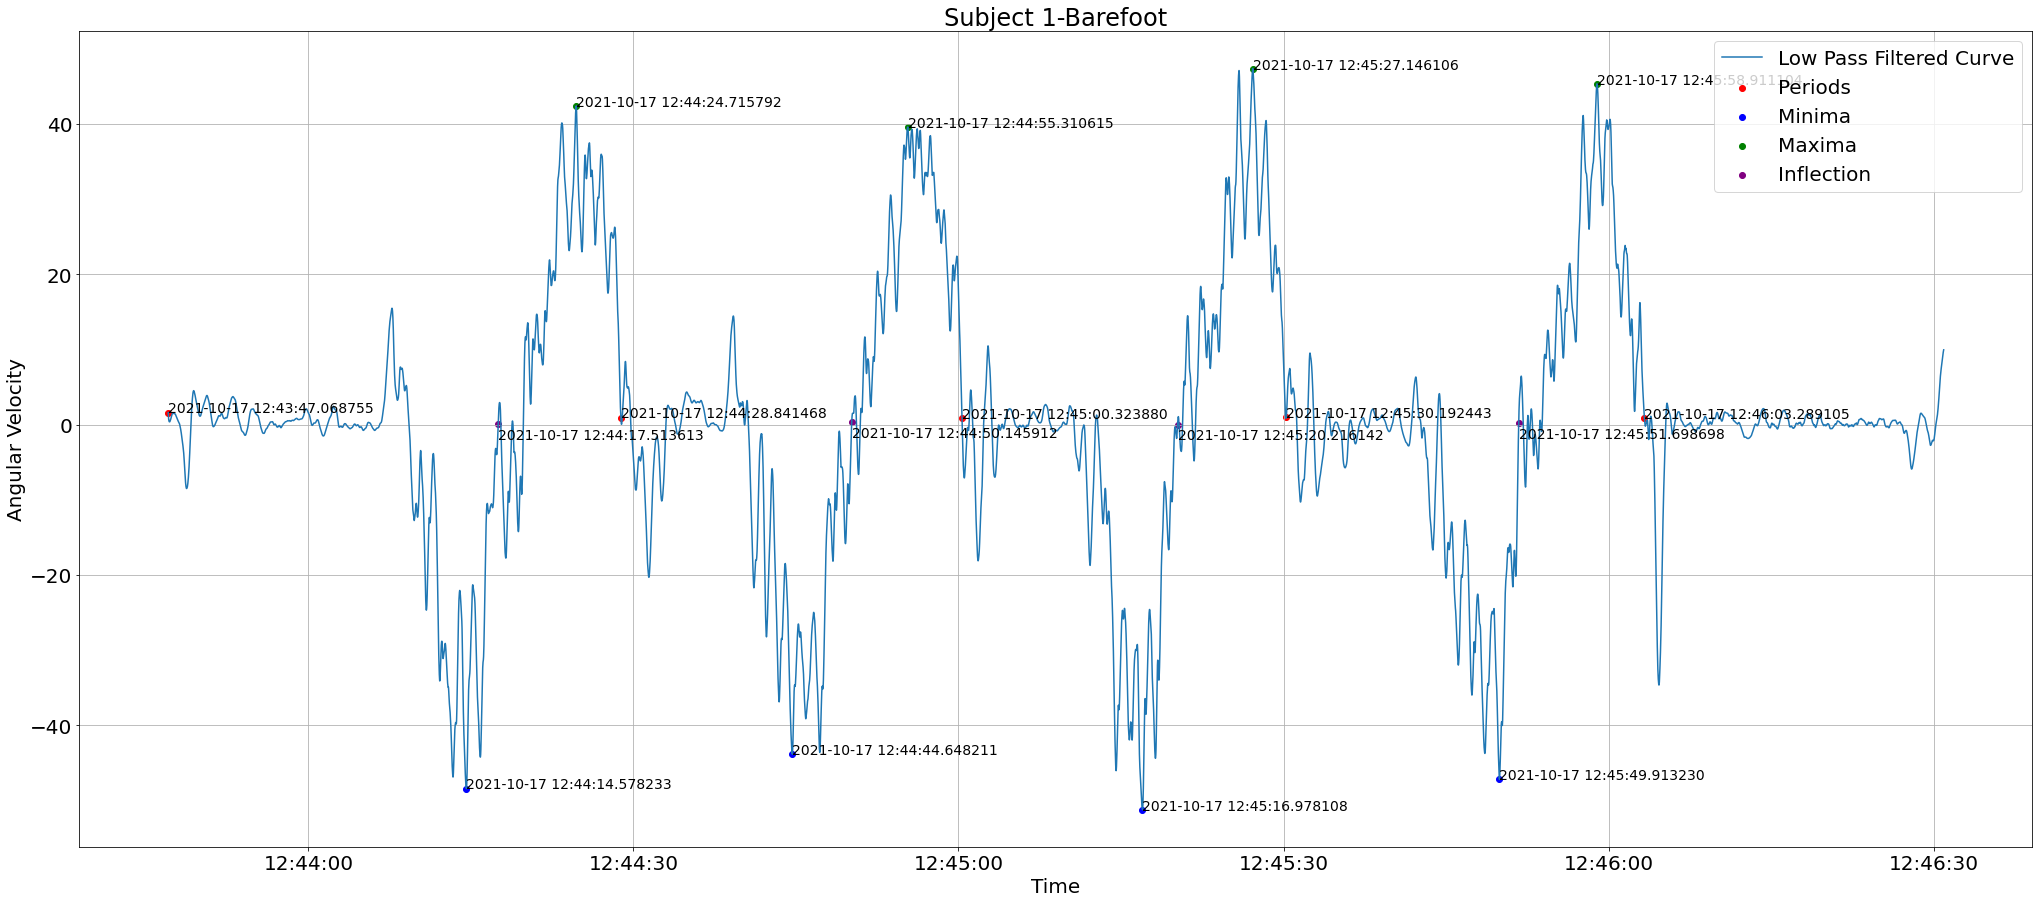

In [48]:
result_periods, result_period_indices, result_inflection_indices = mark_periods(anna_averaged[0],'gyro_x')
result_min_max, result_min_indices, result_max_indices = find_min_max(anna_averaged[0],'gyro_x', result_period_indices)

# Convert date/time column to datetime format
anna_averaged[0]['Date/Time'] = pd.to_datetime(anna_averaged[0]['Date/Time'])
x_data_averaged = anna_averaged[0]['Date/Time']
y_data_averaged = anna_averaged[0]['gyro_x']       
plt.figure(figsize=(35,15))
plt.plot(x_data_averaged, y_data_averaged, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods, [y_data_averaged[x_data_averaged == timestamp].values[0] for timestamp in result_periods], color='red', label='Periods')
for time in result_periods:
    plt.text(time, y_data_averaged[x_data_averaged == time].values[0], str(time), fontsize=14, color='black')

minima_times = [x_data_averaged[i] for i in result_min_indices]
maxima_times = [x_data_averaged[i] for i in result_max_indices]
# Mark the points specified by result_min_indices
plt.scatter(minima_times, [y_data_averaged[i] for i in result_min_indices], color='blue', label='Minima')
for i, time in enumerate(minima_times):
    plt.text(time, y_data_averaged[result_min_indices[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times, [y_data_averaged[i] for i in result_max_indices], color='green', label='Maxima')
for i, time in enumerate(maxima_times):
    plt.text(time, y_data_averaged[result_max_indices[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times = [x_data_averaged[i] for i in result_inflection_indices]
plt.scatter(inflection_times, [y_data_averaged[i] for i in result_inflection_indices], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times):
    plt.text(time, y_data_averaged[result_inflection_indices[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

with open('subject_1_barefoot_timestamps.txt', 'w') as file:
    file.write("Minima Timestamps:\n")
    for time in minima_times:
        file.write(str(time) + '\n')
    
    file.write("\nMaxima Timestamps:\n")
    for time in maxima_times:
        file.write(str(time) + '\n')
    
    file.write("\nWalking Period Timestamps:\n")
    for time in result_periods:
        file.write(str(time) + '\n')
    
    file.write("\nInflection Timestamps:\n")
    for time in inflection_times:
        file.write(str(time) + '\n')

**ANNA FLATSOLE**

In [11]:
result_periods_anna_2, result_period_indices_anna_2, result_inflection_indices_anna_2 = mark_periods(anna_averaged[1],'gyro_x')
result_min_max_anna_2, result_min_indices_anna_2, result_max_indices_anna_2 = find_min_max(anna_averaged[1],'gyro_x', result_period_indices_anna_2)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
anna_averaged[1]['Date/Time'] = pd.to_datetime(anna_averaged[1]['Date/Time'])
x_data_averaged_anna_2 = anna_averaged[1]['Date/Time']
y_data_averaged_anna_2 = anna_averaged[1]['gyro_x']

plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_anna_2, y_data_averaged_anna_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_anna_2, [y_data_averaged_anna_2[x_data_averaged_anna_2 == timestamp].values[0] for timestamp in result_periods_anna_2], color='red', label='Periods')
for time in result_periods_anna_2:
    plt.text(time, y_data_averaged_anna_2[x_data_averaged_anna_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_anna_2 = [x_data_averaged_anna_2[i] for i in result_min_indices_anna_2]
maxima_times_anna_2 = [x_data_averaged_anna_2[i] for i in result_max_indices_anna_2]

# Mark the points specified by result_min_indices
plt.scatter(minima_times_anna_2, [y_data_averaged_anna_2[i] for i in result_min_indices_anna_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_anna_2):
    plt.text(time, y_data_averaged_anna_2[result_min_indices_anna_2[i]], str(time), fontsize=14, color='black')
# Mark the points specified by result_max_indices
plt.scatter(maxima_times_anna_2, [y_data_averaged_anna_2[i] for i in result_max_indices_anna_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_anna_2):
    plt.text(time, y_data_averaged_anna_2[result_max_indices_anna_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times = [x_data_averaged_anna_2[i] for i in result_inflection_indices_anna_2]
plt.scatter(inflection_times, [y_data_averaged_anna_2[i] for i in result_inflection_indices_anna_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times):
    plt.text(time, y_data_averaged_anna_2[result_inflection_indices_anna_2[i]] - 2 , str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Flatsole Sandals')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

with open('subject_1_flatsole_timestamps.txt', 'w') as file:
    file.write("Minima Timestamps:\n")
    for time in minima_times:
        file.write(str(time) + '\n')
    
    file.write("\nMaxima Timestamps:\n")
    for time in maxima_times:
        file.write(str(time) + '\n')
    
    file.write("\nWalking Period Timestamps:\n")
    for time in result_periods:
        file.write(str(time) + '\n')
    
    file.write("\nInflection Timestamps:\n")
    for time in inflection_times:
        file.write(str(time) + '\n')

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T13:19:45.384817'

<Figure size 1800x720 with 1 Axes>

**ANNA WEDGE**

In [12]:
result_periods_anna_3, result_period_indices_anna_3, result_inflection_indices_anna_3 = mark_periods(anna_averaged[2],'gyro_x')
result_min_max_anna_3, result_min_indices_anna_3, result_max_indices_anna_3 = find_min_max(anna_averaged[2],'gyro_x', result_period_indices_anna_3)

# Convert date/time column to datetime format
anna_averaged[2]['Date/Time'] = pd.to_datetime(anna_averaged[2]['Date/Time'])
x_data_averaged_anna_3 = anna_averaged[2]['Date/Time']
y_data_averaged_anna_3 = anna_averaged[2]['gyro_x']

plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_anna_3, y_data_averaged_anna_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_anna_3, [y_data_averaged_anna_3[x_data_averaged_anna_3 == timestamp].values[0] for timestamp in result_periods_anna_3], color='red', label='Periods')
for time in result_periods_anna_3:
    plt.text(time, y_data_averaged_anna_3[x_data_averaged_anna_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_anna_3 = [x_data_averaged_anna_3[i] for i in result_min_indices_anna_3]
maxima_times_anna_3 = [x_data_averaged_anna_3[i] for i in result_max_indices_anna_3]

# Mark the points specified by result_min_indices
plt.scatter(minima_times_anna_3, [y_data_averaged_anna_3[i] for i in result_min_indices_anna_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_anna_3):
    plt.text(time, y_data_averaged_anna_3[result_min_indices_anna_3[i]], str(time), fontsize=14, color='black')
# Mark the points specified by result_max_indices
plt.scatter(maxima_times_anna_3, [y_data_averaged_anna_3[i] for i in result_max_indices_anna_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_anna_3):
    plt.text(time, y_data_averaged_anna_3[result_max_indices_anna_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_anna_3 = [x_data_averaged_anna_3[i] for i in result_inflection_indices_anna_3]
plt.scatter(inflection_times_anna_3, [y_data_averaged_anna_3[i] for i in result_inflection_indices_anna_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_anna_3):
    plt.text(time, y_data_averaged_anna_3[result_inflection_indices_anna_3[i]] - 2 , str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Medially Wedged Sandals')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T13:02:43.030653'

<Figure size 1800x720 with 1 Axes>

**ANNA OWN**

In [13]:
result_periods_anna_4, result_period_indices_anna_4, result_inflection_indices_anna_4 = mark_periods(anna_averaged[3],'gyro_x')
result_min_max_anna_4, result_min_indices_anna_4, result_max_indices_anna_4 = find_min_max(anna_averaged[3],'gyro_x', result_period_indices_anna_4)

# Convert date/time column to datetime format
anna_averaged[3]['Date/Time'] = pd.to_datetime(anna_averaged[3]['Date/Time'])
x_data_averaged_anna_4 = anna_averaged[3]['Date/Time']
y_data_averaged_anna_4 = anna_averaged[3]['gyro_x']

plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_anna_4, y_data_averaged_anna_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_anna_4, [y_data_averaged_anna_4[x_data_averaged_anna_4 == timestamp].values[0] for timestamp in result_periods_anna_4], color='red', label='Periods')
for time in result_periods_anna_4:
    plt.text(time, y_data_averaged_anna_4[x_data_averaged_anna_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_anna_4 = [x_data_averaged_anna_4[i] for i in result_min_indices_anna_4]
maxima_times_anna_4 = [x_data_averaged_anna_4[i] for i in result_max_indices_anna_4]

# Mark the points specified by result_min_indices
plt.scatter(minima_times_anna_4, [y_data_averaged_anna_4[i] for i in result_min_indices_anna_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_anna_4):
    plt.text(time, y_data_averaged_anna_4[result_min_indices_anna_4[i]], str(time), fontsize=14, color='black')
# Mark the points specified by result_max_indices
plt.scatter(maxima_times_anna_4, [y_data_averaged_anna_4[i] for i in result_max_indices_anna_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_anna_4):
    plt.text(time, y_data_averaged_anna_4[result_max_indices_anna_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_anna_4 = [x_data_averaged_anna_4[i] for i in result_inflection_indices_anna_4]
plt.scatter(inflection_times_anna_4, [y_data_averaged_anna_4[i] for i in result_inflection_indices_anna_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_anna_4):
    plt.text(time, y_data_averaged_anna_4[result_inflection_indices_anna_4[i]] - 2 , str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Personal Shoes')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T13:07:24.224499'

<Figure size 1800x720 with 1 Axes>

**ANNA GAITLINE NO WEDGE**

In [14]:
result_periods_anna_5, result_period_indices_anna_5, result_inflection_indices_anna_5 = mark_periods(anna_averaged[4],'gyro_x')
result_min_max_anna_5, result_min_indices_anna_5, result_max_indices_anna_5 = find_min_max(anna_averaged[4],'gyro_x', result_period_indices_anna_5)

# Convert date/time column to datetime format
anna_averaged[4]['Date/Time'] = pd.to_datetime(anna_averaged[4]['Date/Time'])
x_data_averaged_anna_5 = anna_averaged[4]['Date/Time']
y_data_averaged_anna_5 = anna_averaged[4]['gyro_x']

plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_anna_5, y_data_averaged_anna_5, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_anna_5, [y_data_averaged_anna_5[x_data_averaged_anna_5 == timestamp].values[0] for timestamp in result_periods_anna_5], color='red', label='Periods')
for time in result_periods_anna_5:
    plt.text(time, y_data_averaged_anna_5[x_data_averaged_anna_5 == time].values[0], str(time), fontsize=14, color='black')

minima_times_anna_5 = [x_data_averaged_anna_5[i] for i in result_min_indices_anna_5]
maxima_times_anna_5 = [x_data_averaged_anna_5[i] for i in result_max_indices_anna_5]

# Mark the points specified by result_min_indices
plt.scatter(minima_times_anna_5, [y_data_averaged_anna_5[i] for i in result_min_indices_anna_5], color='blue', label='Minima')
for i, time in enumerate(minima_times_anna_5):
    plt.text(time, y_data_averaged_anna_5[result_min_indices_anna_5[i]], str(time), fontsize=14, color='black')
# Mark the points specified by result_max_indices
plt.scatter(maxima_times_anna_5, [y_data_averaged_anna_5[i] for i in result_max_indices_anna_5], color='green', label='Maxima')
for i, time in enumerate(maxima_times_anna_5):
    plt.text(time, y_data_averaged_anna_5[result_max_indices_anna_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_anna_5 = [x_data_averaged_anna_5[i] for i in result_inflection_indices_anna_5]
plt.scatter(inflection_times_anna_5, [y_data_averaged_anna_5[i] for i in result_inflection_indices_anna_5], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_anna_5):
    plt.text(time, y_data_averaged_anna_5[result_inflection_indices_anna_5[i]] - 2 , str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Gaitline Shoes Without Medial Wedge')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T13:13:20.154946'

<Figure size 1800x720 with 1 Axes>

**ANNA GAITLINE WITH WEDGE**

In [15]:
result_periods_anna_6, result_period_indices_anna_6, result_inflection_indices_anna_6 = mark_periods(anna_averaged[5],'gyro_x')
result_min_max_anna_6, result_min_indices_anna_6, result_max_indices_anna_6 = find_min_max(anna_averaged[5],'gyro_x', result_period_indices_anna_6)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
anna_averaged[5]['Date/Time'] = pd.to_datetime(anna_averaged[5]['Date/Time'])
x_data_averaged_anna_6 = anna_averaged[5]['Date/Time']
y_data_averaged_anna_6 = anna_averaged[5]['gyro_x']

plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_anna_6, y_data_averaged_anna_6, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_anna_6, [y_data_averaged_anna_6[x_data_averaged_anna_6 == timestamp].values[0] for timestamp in result_periods_anna_6], color='red', label='Periods')
for time in result_periods_anna_6:
    plt.text(time, y_data_averaged_anna_6[x_data_averaged_anna_6 == time].values[0], str(time), fontsize=14, color='black')

minima_times_anna_6 = [x_data_averaged_anna_6[i] for i in result_min_indices_anna_6]
maxima_times_anna_6 = [x_data_averaged_anna_6[i] for i in result_max_indices_anna_6]

# Mark the points specified by result_min_indices
plt.scatter(minima_times_anna_6, [y_data_averaged_anna_6[i] for i in result_min_indices_anna_6], color='blue', label='Minima')
for i, time in enumerate(minima_times_anna_6):
    plt.text(time, y_data_averaged_anna_6[result_min_indices_anna_6[i]], str(time), fontsize=14, color='black')
# Mark the points specified by result_max_indices
plt.scatter(maxima_times_anna_6, [y_data_averaged_anna_6[i] for i in result_max_indices_anna_6], color='green', label='Maxima')
for i, time in enumerate(maxima_times_anna_6):
    plt.text(time, y_data_averaged_anna_6[result_max_indices_anna_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_anna_6 = [x_data_averaged_anna_6[i] for i in result_inflection_indices_anna_6]
plt.scatter(inflection_times_anna_6, [y_data_averaged_anna_6[i] for i in result_inflection_indices_anna_6], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_anna_6):
    plt.text(time, y_data_averaged_anna_6[result_inflection_indices_anna_6[i]] - 3 , str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 1-Gaitline Shoes With Medial Wedge')
plt.grid(True)
plt.legend()
# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T12:53:32.603006'

<Figure size 1800x720 with 1 Axes>

**BRYNHILD WEDGE**

In [16]:
result_periods_bryn_3, result_period_indices_bryn_3, result_inflection_indices_bryn_3 = mark_periods(brynhild_averaged[3],'gyro_x')
result_min_max_bryn_3, result_min_indices_bryn_3, result_max_indices_byrn_3 = find_min_max(brynhild_averaged[3],'gyro_x', result_period_indices_bryn_3)

# Convert date/time column to datetime format
brynhild_averaged[3]['Date/Time'] = pd.to_datetime(brynhild_averaged[3]['Date/Time'])
x_data_averaged_bryn_3 = brynhild_averaged[3]['Date/Time']
y_data_averaged_bryn_3 = brynhild_averaged[3]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_3, y_data_averaged_bryn_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_3, [y_data_averaged_bryn_3[x_data_averaged_bryn_3 == timestamp].values[0] for timestamp in result_periods_bryn_3], color='red', label='Periods')
for time in result_periods_bryn_3:
    plt.text(time, y_data_averaged_bryn_3[x_data_averaged_bryn_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_3 = [x_data_averaged_bryn_3[i] for i in result_min_indices_bryn_3]
maxima_times_bryn_3 = [x_data_averaged_bryn_3[i] for i in result_max_indices_byrn_3]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_3, [y_data_averaged_bryn_3[i] for i in result_min_indices_bryn_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_3):
    plt.text(time, y_data_averaged_bryn_3[result_min_indices_bryn_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_3, [y_data_averaged_bryn_3[i] for i in result_max_indices_byrn_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_3):
    plt.text(time, y_data_averaged_bryn_3[result_max_indices_byrn_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_3 = [x_data_averaged_bryn_3[i] for i in result_inflection_indices_bryn_3]
plt.scatter(inflection_times_bryn_3, [y_data_averaged_bryn_3[i] for i in result_inflection_indices_bryn_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_3):
    plt.text(time, y_data_averaged_bryn_3[result_inflection_indices_bryn_3[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Medially Wedged Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T13:03:23.522288'

<Figure size 1800x720 with 1 Axes>

**BRYNHILD BAREFOOT**

In [17]:
result_periods_bryn_1, result_period_indices_bryn_1, result_inflection_indices_bryn_1 = mark_periods(brynhild_averaged[0],'gyro_x')
result_min_max_bryn_1, result_min_indices_bryn_1, result_max_indices_byrn_1 = find_min_max(brynhild_averaged[0],'gyro_x', result_period_indices_bryn_1)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
brynhild_averaged[0]['Date/Time'] = pd.to_datetime(brynhild_averaged[0]['Date/Time'])
x_data_averaged_bryn_1 = brynhild_averaged[0]['Date/Time']
y_data_averaged_bryn_1 = brynhild_averaged[0]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_1, y_data_averaged_bryn_1, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_1, [y_data_averaged_bryn_1[x_data_averaged_bryn_1 == timestamp].values[0] for timestamp in result_periods_bryn_1], color='red', label='Periods')
for time in result_periods_bryn_1:
    plt.text(time, y_data_averaged_bryn_1[x_data_averaged_bryn_1 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_1 = [x_data_averaged_bryn_1[i] for i in result_min_indices_bryn_1]
maxima_times_bryn_1 = [x_data_averaged_bryn_1[i] for i in result_max_indices_byrn_1]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_1, [y_data_averaged_bryn_1[i] for i in result_min_indices_bryn_1], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_1):
    plt.text(time, y_data_averaged_bryn_1[result_min_indices_bryn_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_1, [y_data_averaged_bryn_1[i] for i in result_max_indices_byrn_1], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_1):
    plt.text(time, y_data_averaged_bryn_1[result_max_indices_byrn_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_1 = [x_data_averaged_bryn_1[i] for i in result_inflection_indices_bryn_1]
plt.scatter(inflection_times_bryn_1, [y_data_averaged_bryn_1[i] for i in result_inflection_indices_bryn_1], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_1):
    plt.text(time, y_data_averaged_bryn_1[result_inflection_indices_bryn_1[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T13:09:46.433584'

<Figure size 1800x720 with 1 Axes>

**BRYNHILD OWN**

In [18]:
result_periods_bryn_4, result_period_indices_bryn_4, result_inflection_indices_bryn_4 = mark_periods(brynhild_averaged[5],'gyro_x')
result_min_max_bryn_4, result_min_indices_bryn_4, result_max_indices_byrn_4 = find_min_max(brynhild_averaged[5],'gyro_x', result_period_indices_bryn_4)

# Convert date/time column to datetime format
brynhild_averaged[5]['Date/Time'] = pd.to_datetime(brynhild_averaged[5]['Date/Time'])
x_data_averaged_bryn_4 = brynhild_averaged[5]['Date/Time']
y_data_averaged_bryn_4 = brynhild_averaged[5]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_4, y_data_averaged_bryn_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_4, [y_data_averaged_bryn_4[x_data_averaged_bryn_4 == timestamp].values[0] for timestamp in result_periods_bryn_4], color='red', label='Periods')
for time in result_periods_bryn_4:
    plt.text(time, y_data_averaged_bryn_4[x_data_averaged_bryn_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_4 = [x_data_averaged_bryn_4[i] for i in result_min_indices_bryn_4]
maxima_times_bryn_4 = [x_data_averaged_bryn_4[i] for i in result_max_indices_byrn_4]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_4, [y_data_averaged_bryn_4[i] for i in result_min_indices_bryn_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_4):
    plt.text(time, y_data_averaged_bryn_4[result_min_indices_bryn_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_4, [y_data_averaged_bryn_4[i] for i in result_max_indices_byrn_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_4):
    plt.text(time, y_data_averaged_bryn_4[result_max_indices_byrn_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_4 = [x_data_averaged_bryn_4[i] for i in result_inflection_indices_bryn_4]
plt.scatter(inflection_times_bryn_4, [y_data_averaged_bryn_4[i] for i in result_inflection_indices_bryn_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_4):
    plt.text(time, y_data_averaged_bryn_4[result_inflection_indices_bryn_4[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Personal  Shoes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T12:49:52.167198'

<Figure size 1800x720 with 1 Axes>

**BRYN GAITLINE NO WEDGE**

In [19]:
result_periods_bryn_5, result_period_indices_bryn_5, result_inflection_indices_bryn_5 = mark_periods(brynhild_averaged[6],'gyro_x')
result_min_max_bryn_5, result_min_indices_bryn_5, result_max_indices_byrn_5 = find_min_max(brynhild_averaged[6],'gyro_x', result_period_indices_bryn_5)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
brynhild_averaged[6]['Date/Time'] = pd.to_datetime(brynhild_averaged[6]['Date/Time'])
x_data_averaged_bryn_5 = brynhild_averaged[6]['Date/Time']
y_data_averaged_bryn_5 = brynhild_averaged[6]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_5, y_data_averaged_bryn_5, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_5, [y_data_averaged_bryn_5[x_data_averaged_bryn_5 == timestamp].values[0] for timestamp in result_periods_bryn_5], color='red', label='Periods')
for time in result_periods_bryn_5:
    plt.text(time, y_data_averaged_bryn_5[x_data_averaged_bryn_5 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_5 = [x_data_averaged_bryn_5[i] for i in result_min_indices_bryn_5]
maxima_times_bryn_5 = [x_data_averaged_bryn_5[i] for i in result_max_indices_byrn_5]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_5, [y_data_averaged_bryn_5[i] for i in result_min_indices_bryn_5], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_5):
    plt.text(time, y_data_averaged_bryn_5[result_min_indices_bryn_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_5, [y_data_averaged_bryn_5[i] for i in result_max_indices_byrn_5], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_5):
    plt.text(time, y_data_averaged_bryn_5[result_max_indices_byrn_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_5 = [x_data_averaged_bryn_5[i] for i in result_inflection_indices_bryn_5]
plt.scatter(inflection_times_bryn_5, [y_data_averaged_bryn_5[i] for i in result_inflection_indices_bryn_5], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_5):
    plt.text(time, y_data_averaged_bryn_5[result_inflection_indices_bryn_5[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Gaitline Shoes Without Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T12:34:11.000088'

<Figure size 1800x720 with 1 Axes>

**BRYN GAITLINE**

In [20]:
result_periods_bryn_6, result_period_indices_bryn_6, result_inflection_indices_bryn_6 = mark_periods(brynhild_averaged[8],'gyro_x')
result_min_max_bryn_6, result_min_indices_bryn_6, result_max_indices_byrn_6 = find_min_max(brynhild_averaged[8],'gyro_x', result_period_indices_bryn_6)

# Convert date/time column to datetime format
brynhild_averaged[8]['Date/Time'] = pd.to_datetime(brynhild_averaged[8]['Date/Time'])
x_data_averaged_bryn_6 = brynhild_averaged[8]['Date/Time']
y_data_averaged_bryn_6 = brynhild_averaged[8]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_6, y_data_averaged_bryn_6, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_6, [y_data_averaged_bryn_6[x_data_averaged_bryn_6 == timestamp].values[0] for timestamp in result_periods_bryn_6], color='red', label='Periods')
for time in result_periods_bryn_6:
    plt.text(time, y_data_averaged_bryn_6[x_data_averaged_bryn_6 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_6 = [x_data_averaged_bryn_6[i] for i in result_min_indices_bryn_6]
maxima_times_bryn_6 = [x_data_averaged_bryn_6[i] for i in result_max_indices_byrn_6]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_6, [y_data_averaged_bryn_6[i] for i in result_min_indices_bryn_6], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_6):
    plt.text(time, y_data_averaged_bryn_6[result_min_indices_bryn_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_6, [y_data_averaged_bryn_6[i] for i in result_max_indices_byrn_6], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_6):
    plt.text(time, y_data_averaged_bryn_6[result_max_indices_byrn_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_6 = [x_data_averaged_bryn_6[i] for i in result_inflection_indices_bryn_6]
plt.scatter(inflection_times_bryn_6, [y_data_averaged_bryn_6[i] for i in result_inflection_indices_bryn_6], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_6):
    plt.text(time, y_data_averaged_bryn_6[result_inflection_indices_bryn_6[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Gaitline Shoes With Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T12:58:44.991946'

<Figure size 1800x720 with 1 Axes>

**CELINE BAREFOOT**

In [21]:
result_periods_cel_1, result_period_indices_cel_1, result_inflection_indices_cel_1 = mark_periods(celine_averaged[0],'gyro_x')
result_min_max_cel_1, result_min_indices_cel_1, result_max_indices_cel_1 = find_min_max(celine_averaged[0],'gyro_x', result_period_indices_cel_1)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
celine_averaged[0]['Date/Time'] = pd.to_datetime(celine_averaged[0]['Date/Time'])
x_data_averaged_cel_1 = celine_averaged[0]['Date/Time']
y_data_averaged_cel_1 = celine_averaged[0]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_cel_1, y_data_averaged_cel_1, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_cel_1, [y_data_averaged_cel_1[x_data_averaged_cel_1 == timestamp].values[0] for timestamp in result_periods_cel_1], color='red', label='Periods')
for time in result_periods_cel_1:
    plt.text(time, y_data_averaged_cel_1[x_data_averaged_cel_1 == time].values[0], str(time), fontsize=14, color='black')

minima_times_cel_1 = [x_data_averaged_cel_1[i] for i in result_min_indices_cel_1]
maxima_times_cel_1 = [x_data_averaged_cel_1[i] for i in result_max_indices_cel_1]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_cel_1, [y_data_averaged_cel_1[i] for i in result_min_indices_cel_1], color='blue', label='Minima')
for i, time in enumerate(minima_times_cel_1):
    plt.text(time, y_data_averaged_cel_1[result_min_indices_cel_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_cel_1, [y_data_averaged_cel_1[i] for i in result_max_indices_cel_1], color='green', label='Maxima')
for i, time in enumerate(maxima_times_cel_1):
    plt.text(time, y_data_averaged_cel_1[result_max_indices_cel_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_cel_1 = [x_data_averaged_cel_1[i] for i in result_inflection_indices_cel_1]
plt.scatter(inflection_times_cel_1, [y_data_averaged_cel_1[i] for i in result_inflection_indices_cel_1], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_cel_1):
    plt.text(time, y_data_averaged_cel_1[result_inflection_indices_cel_1[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 3-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T15:57:32.191592'

<Figure size 1800x720 with 1 Axes>

**CELINE WEDGE**

In [22]:
result_periods_cel_3, result_period_indices_cel_3, result_inflection_indices_cel_3 = mark_periods(celine_averaged[2],'gyro_x')
result_min_max_cel_3, result_min_indices_cel_3, result_max_indices_cel_3 = find_min_max(celine_averaged[2],'gyro_x', result_period_indices_cel_3)

# Convert date/time column to datetime format
celine_averaged[2]['Date/Time'] = pd.to_datetime(celine_averaged[2]['Date/Time'])
x_data_averaged_cel_3 = celine_averaged[2]['Date/Time']
y_data_averaged_cel_3 = celine_averaged[2]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_cel_3, y_data_averaged_cel_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_cel_3, [y_data_averaged_cel_3[x_data_averaged_cel_3 == timestamp].values[0] for timestamp in result_periods_cel_3], color='red', label='Periods')
for time in result_periods_cel_3:
    plt.text(time, y_data_averaged_cel_3[x_data_averaged_cel_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_cel_3 = [x_data_averaged_cel_3[i] for i in result_min_indices_cel_3]
maxima_times_cel_3 = [x_data_averaged_cel_3[i] for i in result_max_indices_cel_3]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_cel_3, [y_data_averaged_cel_3[i] for i in result_min_indices_cel_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_cel_3):
    plt.text(time, y_data_averaged_cel_3[result_min_indices_cel_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_cel_3, [y_data_averaged_cel_3[i] for i in result_max_indices_cel_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_cel_3):
    plt.text(time, y_data_averaged_cel_3[result_max_indices_cel_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_cel_3 = [x_data_averaged_cel_3[i] for i in result_inflection_indices_cel_3]
plt.scatter(inflection_times_cel_3, [y_data_averaged_cel_3[i] for i in result_inflection_indices_cel_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_cel_3):
    plt.text(time, y_data_averaged_cel_3[result_inflection_indices_cel_3[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 3-Medially Wedged Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T16:15:06.213804'

<Figure size 1800x720 with 1 Axes>

**CELINE OWN**

In [23]:
result_periods_cel_4, result_period_indices_cel_4, result_inflection_indices_cel_4 = mark_periods(celine_averaged[3],'gyro_x')
result_min_max_cel_4, result_min_indices_cel_4, result_max_indices_cel_4 = find_min_max(celine_averaged[3],'gyro_x', result_period_indices_cel_4)

# Convert date/time column to datetime format
celine_averaged[3]['Date/Time'] = pd.to_datetime(celine_averaged[3]['Date/Time'])
x_data_averaged_cel_4 = celine_averaged[3]['Date/Time']
y_data_averaged_cel_4 = celine_averaged[3]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_cel_4, y_data_averaged_cel_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_cel_4, [y_data_averaged_cel_4[x_data_averaged_cel_4 == timestamp].values[0] for timestamp in result_periods_cel_4], color='red', label='Periods')
for time in result_periods_cel_4:
    plt.text(time, y_data_averaged_cel_4[x_data_averaged_cel_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_cel_4 = [x_data_averaged_cel_4[i] for i in result_min_indices_cel_4]
maxima_times_cel_4 = [x_data_averaged_cel_4[i] for i in result_max_indices_cel_4]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_cel_4, [y_data_averaged_cel_4[i] for i in result_min_indices_cel_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_cel_4):
    plt.text(time, y_data_averaged_cel_4[result_min_indices_cel_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_cel_4, [y_data_averaged_cel_4[i] for i in result_max_indices_cel_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_cel_4):
    plt.text(time, y_data_averaged_cel_4[result_max_indices_cel_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_cel_4 = [x_data_averaged_cel_4[i] for i in result_inflection_indices_cel_4]
plt.scatter(inflection_times_cel_4, [y_data_averaged_cel_4[i] for i in result_inflection_indices_cel_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_cel_4):
    plt.text(time, y_data_averaged_cel_4[result_inflection_indices_cel_4[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 3-Personal Shoes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T16:04:59.067503'

<Figure size 1800x720 with 1 Axes>

**CELINE GAITLINE YES/NO? WEDGE**

In [24]:
result_periods_cel_5, result_period_indices_cel_5, result_inflection_indices_cel_5 = mark_periods(celine_averaged[4],'gyro_x')
result_min_max_cel_5, result_min_indices_cel_5, result_max_indices_cel_5 = find_min_max(celine_averaged[4],'gyro_x', result_period_indices_cel_5)

# Convert date/time column to datetime format
celine_averaged[4]['Date/Time'] = pd.to_datetime(celine_averaged[4]['Date/Time'])
x_data_averaged_cel_5 = celine_averaged[4]['Date/Time']
y_data_averaged_cel_5 = celine_averaged[4]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_cel_5, y_data_averaged_cel_5, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_cel_5, [y_data_averaged_cel_5[x_data_averaged_cel_5 == timestamp].values[0] for timestamp in result_periods_cel_5], color='red', label='Periods')
for time in result_periods_cel_5:
    plt.text(time, y_data_averaged_cel_5[x_data_averaged_cel_5 == time].values[0], str(time), fontsize=14, color='black')

minima_times_cel_5 = [x_data_averaged_cel_5[i] for i in result_min_indices_cel_5]
maxima_times_cel_5 = [x_data_averaged_cel_5[i] for i in result_max_indices_cel_5]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_cel_5, [y_data_averaged_cel_5[i] for i in result_min_indices_cel_5], color='blue', label='Minima')
for i, time in enumerate(minima_times_cel_5):
    plt.text(time, y_data_averaged_cel_5[result_min_indices_cel_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_cel_5, [y_data_averaged_cel_5[i] for i in result_max_indices_cel_5], color='green', label='Maxima')
for i, time in enumerate(maxima_times_cel_5):
    plt.text(time, y_data_averaged_cel_5[result_max_indices_cel_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_cel_5 = [x_data_averaged_cel_5[i] for i in result_inflection_indices_cel_5]
plt.scatter(inflection_times_cel_5, [y_data_averaged_cel_5[i] for i in result_inflection_indices_cel_5], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_cel_5):
    plt.text(time, y_data_averaged_cel_5[result_inflection_indices_cel_5[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 3-Gaitline Shoes Without Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T16:25:42.456779'

<Figure size 1800x720 with 1 Axes>

**FRIDA BAREFOOT**

In [25]:
result_periods_fri_1, result_period_indices_fri_1, result_inflection_indices_fri_1 = mark_periods(frida_averaged[0],'gyro_x')
result_min_max_fri_1, result_min_indices_fri_1, result_max_indices_fri_1 = find_min_max(frida_averaged[0],'gyro_x', result_period_indices_fri_1)

# Convert date/time column to datetime format
frida_averaged[0]['Date/Time'] = pd.to_datetime(frida_averaged[0]['Date/Time'])
x_data_averaged_fri_1 = frida_averaged[0]['Date/Time']
y_data_averaged_fri_1 = frida_averaged[0]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_1, y_data_averaged_fri_1, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_1, [y_data_averaged_fri_1[x_data_averaged_fri_1 == timestamp].values[0] for timestamp in result_periods_fri_1], color='red', label='Periods')
for time in result_periods_fri_1:
    plt.text(time, y_data_averaged_fri_1[x_data_averaged_fri_1 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_1 = [x_data_averaged_fri_1[i] for i in result_min_indices_fri_1]
maxima_times_fri_1 = [x_data_averaged_fri_1[i] for i in result_max_indices_fri_1]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_1, [y_data_averaged_fri_1[i] for i in result_min_indices_fri_1], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_1):
    plt.text(time, y_data_averaged_fri_1[result_min_indices_fri_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_1, [y_data_averaged_fri_1[i] for i in result_max_indices_fri_1], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_1):
    plt.text(time, y_data_averaged_fri_1[result_max_indices_fri_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_1 = [x_data_averaged_fri_1[i] for i in result_inflection_indices_fri_1]
plt.scatter(inflection_times_fri_1, [y_data_averaged_fri_1[i] for i in result_inflection_indices_fri_1], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_1):
    plt.text(time, y_data_averaged_fri_1[result_inflection_indices_fri_1[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:38:10.194887'

<Figure size 1800x720 with 1 Axes>

**FRIDA WEDGE**

In [26]:
result_periods_fri_3, result_period_indices_fri_3, result_inflection_indices_fri_3 = mark_periods(frida_averaged[2],'gyro_x')
result_min_max_fri_3, result_min_indices_fri_3, result_max_indices_fri_3 = find_min_max(frida_averaged[2],'gyro_x', result_period_indices_fri_3)

# Convert date/time column to datetime format
frida_averaged[2]['Date/Time'] = pd.to_datetime(frida_averaged[2]['Date/Time'])
x_data_averaged_fri_3 = frida_averaged[2]['Date/Time']
y_data_averaged_fri_3 = frida_averaged[2]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_3, y_data_averaged_fri_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_3, [y_data_averaged_fri_3[x_data_averaged_fri_3 == timestamp].values[0] for timestamp in result_periods_fri_3], color='red', label='Periods')
for time in result_periods_fri_3:
    plt.text(time, y_data_averaged_fri_3[x_data_averaged_fri_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_3 = [x_data_averaged_fri_3[i] for i in result_min_indices_fri_3]
maxima_times_fri_3 = [x_data_averaged_fri_3[i] for i in result_max_indices_fri_3]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_3, [y_data_averaged_fri_3[i] for i in result_min_indices_fri_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_3):
    plt.text(time, y_data_averaged_fri_3[result_min_indices_fri_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_3, [y_data_averaged_fri_3[i] for i in result_max_indices_fri_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_3):
    plt.text(time, y_data_averaged_fri_3[result_max_indices_fri_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_3 = [x_data_averaged_fri_3[i] for i in result_inflection_indices_fri_3]
plt.scatter(inflection_times_fri_3, [y_data_averaged_fri_3[i] for i in result_inflection_indices_fri_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_3):
    plt.text(time, y_data_averaged_fri_3[result_inflection_indices_fri_3[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Medially Wedged Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:48:53.880343'

<Figure size 1800x720 with 1 Axes>

**FRIDA OWN**

In [27]:
result_periods_fri_4, result_period_indices_fri_4, result_inflection_indices_fri_4 = mark_periods(frida_averaged[3],'gyro_x')
result_min_max_fri_4, result_min_indices_fri_4, result_max_indices_fri_4 = find_min_max(frida_averaged[3],'gyro_x', result_period_indices_fri_4)

# Convert date/time column to datetime format
frida_averaged[3]['Date/Time'] = pd.to_datetime(frida_averaged[3]['Date/Time'])
x_data_averaged_fri_4 = frida_averaged[3]['Date/Time']
y_data_averaged_fri_4 = frida_averaged[3]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_4, y_data_averaged_fri_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_4, [y_data_averaged_fri_4[x_data_averaged_fri_4 == timestamp].values[0] for timestamp in result_periods_fri_4], color='red', label='Periods')
for time in result_periods_fri_4:
    plt.text(time, y_data_averaged_fri_4[x_data_averaged_fri_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_4 = [x_data_averaged_fri_4[i] for i in result_min_indices_fri_4]
maxima_times_fri_4 = [x_data_averaged_fri_4[i] for i in result_max_indices_fri_4]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_4, [y_data_averaged_fri_4[i] for i in result_min_indices_fri_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_4):
    plt.text(time, y_data_averaged_fri_4[result_min_indices_fri_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_4, [y_data_averaged_fri_4[i] for i in result_max_indices_fri_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_4):
    plt.text(time, y_data_averaged_fri_4[result_max_indices_fri_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_4 = [x_data_averaged_fri_4[i] for i in result_inflection_indices_fri_4]
plt.scatter(inflection_times_fri_4, [y_data_averaged_fri_4[i] for i in result_inflection_indices_fri_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_4):
    plt.text(time, y_data_averaged_fri_4[result_inflection_indices_fri_4[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Personal Shoes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:22:18.447233'

<Figure size 1800x720 with 1 Axes>

**FRIDA GAITLINE NO WEDGE**

In [28]:
result_periods_fri_5, result_period_indices_fri_5, result_inflection_indices_fri_5 = mark_periods(frida_averaged[4],'gyro_x')
result_min_max_fri_5, result_min_indices_fri_5, result_max_indices_fri_5 = find_min_max(frida_averaged[4],'gyro_x', result_period_indices_fri_5)

# Convert date/time column to datetime format
frida_averaged[4]['Date/Time'] = pd.to_datetime(frida_averaged[4]['Date/Time'])
x_data_averaged_fri_5 = frida_averaged[4]['Date/Time']
y_data_averaged_fri_5 = frida_averaged[4]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_5, y_data_averaged_fri_5, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_5, [y_data_averaged_fri_5[x_data_averaged_fri_5 == timestamp].values[0] for timestamp in result_periods_fri_5], color='red', label='Periods')
for time in result_periods_fri_5:
    plt.text(time, y_data_averaged_fri_5[x_data_averaged_fri_5 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_5 = [x_data_averaged_fri_5[i] for i in result_min_indices_fri_5]
maxima_times_fri_5 = [x_data_averaged_fri_5[i] for i in result_max_indices_fri_5]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_5, [y_data_averaged_fri_5[i] for i in result_min_indices_fri_5], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_5):
    plt.text(time, y_data_averaged_fri_5[result_min_indices_fri_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_5, [y_data_averaged_fri_5[i] for i in result_max_indices_fri_5], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_5):
    plt.text(time, y_data_averaged_fri_5[result_max_indices_fri_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_5 = [x_data_averaged_fri_5[i] for i in result_inflection_indices_fri_5]
plt.scatter(inflection_times_fri_5, [y_data_averaged_fri_5[i] for i in result_inflection_indices_fri_5], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_5):
    plt.text(time, y_data_averaged_fri_5[result_inflection_indices_fri_5[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Gaitline Shoes Without Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:15:35.412423'

<Figure size 1800x720 with 1 Axes>

**FRIDA GAITLINE WEDGE**

In [29]:
result_periods_fri_6, result_period_indices_fri_6, result_inflection_indices_fri_6 = mark_periods(frida_averaged[5],'gyro_x')
result_min_max_fri_6, result_min_indices_fri_6, result_max_indices_fri_6 = find_min_max(frida_averaged[5],'gyro_x', result_period_indices_fri_6)

# Convert date/time column to datetime format
frida_averaged[5]['Date/Time'] = pd.to_datetime(frida_averaged[5]['Date/Time'])
x_data_averaged_fri_6 = frida_averaged[5]['Date/Time']
y_data_averaged_fri_6 = frida_averaged[5]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_6, y_data_averaged_fri_6, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_6, [y_data_averaged_fri_6[x_data_averaged_fri_6 == timestamp].values[0] for timestamp in result_periods_fri_6], color='red', label='Periods')
for time in result_periods_fri_6:
    plt.text(time, y_data_averaged_fri_6[x_data_averaged_fri_6 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_6 = [x_data_averaged_fri_6[i] for i in result_min_indices_fri_6]
maxima_times_fri_6 = [x_data_averaged_fri_6[i] for i in result_max_indices_fri_6]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_6, [y_data_averaged_fri_6[i] for i in result_min_indices_fri_6], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_6):
    plt.text(time, y_data_averaged_fri_6[result_min_indices_fri_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_6, [y_data_averaged_fri_6[i] for i in result_max_indices_fri_6], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_6):
    plt.text(time, y_data_averaged_fri_6[result_max_indices_fri_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_6 = [x_data_averaged_fri_6[i] for i in result_inflection_indices_fri_6]
plt.scatter(inflection_times_fri_6, [y_data_averaged_fri_6[i] for i in result_inflection_indices_fri_6], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_6):
    plt.text(time, y_data_averaged_fri_6[result_inflection_indices_fri_6[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Gaitline Shoes With Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:54:46.757962'

<Figure size 1800x720 with 1 Axes>

**HAKON BAREFOOT**

In [30]:
result_periods_hak_1, result_period_indices_hak_1, result_inflection_indices_hak_1 = mark_periods(hakon_averaged[0],'gyro_x')
result_min_max_hak_1, result_min_indices_hak_1, result_max_indices_hak_1 = find_min_max(hakon_averaged[0],'gyro_x', result_period_indices_hak_1)

# Convert date/time column to datetime format
hakon_averaged[0]['Date/Time'] = pd.to_datetime(hakon_averaged[0]['Date/Time'])
x_data_averaged_hak_1 = hakon_averaged[0]['Date/Time']
y_data_averaged_hak_1 = hakon_averaged[0]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_1, y_data_averaged_hak_1, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_1, [y_data_averaged_hak_1[x_data_averaged_hak_1 == timestamp].values[0] for timestamp in result_periods_hak_1], color='red', label='Periods')
for time in result_periods_hak_1:
    plt.text(time, y_data_averaged_hak_1[x_data_averaged_hak_1 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_1 = [x_data_averaged_hak_1[i] for i in result_min_indices_hak_1]
maxima_times_hak_1 = [x_data_averaged_hak_1[i] for i in result_max_indices_hak_1]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_1, [y_data_averaged_hak_1[i] for i in result_min_indices_hak_1], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_1):
    plt.text(time, y_data_averaged_hak_1[result_min_indices_hak_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_1, [y_data_averaged_hak_1[i] for i in result_max_indices_hak_1], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_1):
    plt.text(time, y_data_averaged_hak_1[result_max_indices_hak_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_1 = [x_data_averaged_hak_1[i] for i in result_inflection_indices_hak_1]
plt.scatter(inflection_times_hak_1, [y_data_averaged_hak_1[i] for i in result_inflection_indices_hak_1], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_1):
    plt.text(time, y_data_averaged_hak_1[result_inflection_indices_hak_1[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T16:21:03.189564'

<Figure size 1800x720 with 1 Axes>

**HAKON WEDGE**

In [31]:
result_periods_hak_3, result_period_indices_hak_3, result_inflection_indices_hak_3 = mark_periods(hakon_averaged[2],'gyro_x')
result_min_max_hak_3, result_min_indices_hak_3, result_max_indices_hak_3 = find_min_max(hakon_averaged[2],'gyro_x', result_period_indices_hak_3)

# Convert date/time column to datetime format
hakon_averaged[2]['Date/Time'] = pd.to_datetime(hakon_averaged[2]['Date/Time'])
x_data_averaged_hak_3 = hakon_averaged[2]['Date/Time']
y_data_averaged_hak_3 = hakon_averaged[2]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_3, y_data_averaged_hak_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_3, [y_data_averaged_hak_3[x_data_averaged_hak_3 == timestamp].values[0] for timestamp in result_periods_hak_3], color='red', label='Periods')
for time in result_periods_hak_3:
    plt.text(time, y_data_averaged_hak_3[x_data_averaged_hak_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_3 = [x_data_averaged_hak_3[i] for i in result_min_indices_hak_3]
maxima_times_hak_3 = [x_data_averaged_hak_3[i] for i in result_max_indices_hak_3]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_3, [y_data_averaged_hak_3[i] for i in result_min_indices_hak_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_3):
    plt.text(time, y_data_averaged_hak_3[result_min_indices_hak_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_3, [y_data_averaged_hak_3[i] for i in result_max_indices_hak_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_3):
    plt.text(time, y_data_averaged_hak_3[result_max_indices_hak_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_3 = [x_data_averaged_hak_3[i] for i in result_inflection_indices_hak_3]
plt.scatter(inflection_times_hak_3, [y_data_averaged_hak_3[i] for i in result_inflection_indices_hak_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_3):
    plt.text(time, y_data_averaged_hak_3[result_inflection_indices_hak_3[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Medially Wedged Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T16:15:04.886477'

<Figure size 1800x720 with 1 Axes>

**HAKON OWN**

In [32]:
result_periods_hak_4, result_period_indices_hak_4, result_inflection_indices_hak_4 = mark_periods(hakon_averaged[3],'gyro_x')
result_min_max_hak_4, result_min_indices_hak_4, result_max_indices_hak_4 = find_min_max(hakon_averaged[3],'gyro_x', result_period_indices_hak_4)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
hakon_averaged[3]['Date/Time'] = pd.to_datetime(hakon_averaged[3]['Date/Time'])
x_data_averaged_hak_4 = hakon_averaged[3]['Date/Time']
y_data_averaged_hak_4 = hakon_averaged[3]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_4, y_data_averaged_hak_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_4, [y_data_averaged_hak_4[x_data_averaged_hak_4 == timestamp].values[0] for timestamp in result_periods_hak_4], color='red', label='Periods')
for time in result_periods_hak_4:
    plt.text(time, y_data_averaged_hak_4[x_data_averaged_hak_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_4 = [x_data_averaged_hak_4[i] for i in result_min_indices_hak_4]
maxima_times_hak_4 = [x_data_averaged_hak_4[i] for i in result_max_indices_hak_4]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_4, [y_data_averaged_hak_4[i] for i in result_min_indices_hak_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_4):
    plt.text(time, y_data_averaged_hak_4[result_min_indices_hak_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_4, [y_data_averaged_hak_4[i] for i in result_max_indices_hak_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_4):
    plt.text(time, y_data_averaged_hak_4[result_max_indices_hak_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_4 = [x_data_averaged_hak_4[i] for i in result_inflection_indices_hak_4]
plt.scatter(inflection_times_hak_4, [y_data_averaged_hak_4[i] for i in result_inflection_indices_hak_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_4):
    plt.text(time, y_data_averaged_hak_4[result_inflection_indices_hak_4[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Personal Shoes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T16:26:28.719564'

<Figure size 1800x720 with 1 Axes>

**HAKON GAITLINE NO**

In [33]:
result_periods_hak_5, result_period_indices_hak_5, result_inflection_indices_hak_5 = mark_periods(hakon_averaged[4],'gyro_x')
result_min_max_hak_5, result_min_indices_hak_5, result_max_indices_hak_5 = find_min_max(hakon_averaged[4],'gyro_x', result_period_indices_hak_5)

mpl.rcParams.update({'font.size': 20})
# Convert date/time column to datetime format
hakon_averaged[4]['Date/Time'] = pd.to_datetime(hakon_averaged[4]['Date/Time'])
x_data_averaged_hak_5 = hakon_averaged[4]['Date/Time']
y_data_averaged_hak_5 = hakon_averaged[4]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_5, y_data_averaged_hak_5, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_5, [y_data_averaged_hak_5[x_data_averaged_hak_5 == timestamp].values[0] for timestamp in result_periods_hak_5], color='red', label='Periods')
for time in result_periods_hak_5:
    plt.text(time, y_data_averaged_hak_5[x_data_averaged_hak_5 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_5 = [x_data_averaged_hak_5[i] for i in result_min_indices_hak_5]
maxima_times_hak_5 = [x_data_averaged_hak_5[i] for i in result_max_indices_hak_5]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_5, [y_data_averaged_hak_5[i] for i in result_min_indices_hak_5], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_5):
    plt.text(time, y_data_averaged_hak_5[result_min_indices_hak_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_5, [y_data_averaged_hak_5[i] for i in result_max_indices_hak_5], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_5):
    plt.text(time, y_data_averaged_hak_5[result_max_indices_hak_5[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_5 = [x_data_averaged_hak_5[i] for i in result_inflection_indices_hak_5]
plt.scatter(inflection_times_hak_5, [y_data_averaged_hak_5[i] for i in result_inflection_indices_hak_5], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_5):
    plt.text(time, y_data_averaged_hak_5[result_inflection_indices_hak_5[i]] - 4, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Gaitline Shoes Without Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T15:57:42.930255'

<Figure size 1800x720 with 1 Axes>

**HAKON GAITLINE**

In [34]:
result_periods_hak_6, result_period_indices_hak_6, result_inflection_indices_hak_6 = mark_periods(hakon_averaged[7],'gyro_x')
result_min_max_hak_6, result_min_indices_hak_6, result_max_indices_hak_6 = find_min_max(hakon_averaged[7],'gyro_x', result_period_indices_hak_6)

# Convert date/time column to datetime format
hakon_averaged[7]['Date/Time'] = pd.to_datetime(hakon_averaged[7]['Date/Time'])
x_data_averaged_hak_6 = hakon_averaged[7]['Date/Time']
y_data_averaged_hak_6 = hakon_averaged[7]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_6, y_data_averaged_hak_6, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_6, [y_data_averaged_hak_6[x_data_averaged_hak_6 == timestamp].values[0] for timestamp in result_periods_hak_6], color='red', label='Periods')
for time in result_periods_hak_6:
    plt.text(time, y_data_averaged_hak_6[x_data_averaged_hak_6 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_6 = [x_data_averaged_hak_6[i] for i in result_min_indices_hak_6]
maxima_times_hak_6 = [x_data_averaged_hak_6[i] for i in result_max_indices_hak_6]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_6, [y_data_averaged_hak_6[i] for i in result_min_indices_hak_6], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_6):
    plt.text(time, y_data_averaged_hak_6[result_min_indices_hak_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_6, [y_data_averaged_hak_6[i] for i in result_max_indices_hak_6], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_6):
    plt.text(time, y_data_averaged_hak_6[result_max_indices_hak_6[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_6 = [x_data_averaged_hak_6[i] for i in result_inflection_indices_hak_6]
plt.scatter(inflection_times_hak_6, [y_data_averaged_hak_6[i] for i in result_inflection_indices_hak_6], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_6):
    plt.text(time, y_data_averaged_hak_6[result_inflection_indices_hak_6[i]] - 4, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Gaitline Shoes With Wedge')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T15:50:53.077106'

<Figure size 1800x720 with 1 Axes>

**LENA BAREFOOT**

In [35]:
result_periods_lena_1, result_period_indices_lena_1, result_inflection_indices_lena_1 = mark_periods(lena_averaged[0],'gyro_x')
result_min_max_lena_1, result_min_indices_lena_1, result_max_indices_lena_1 = find_min_max(lena_averaged[0],'gyro_x', result_period_indices_lena_1)

# Convert date/time column to datetime format
lena_averaged[0]['Date/Time'] = pd.to_datetime(lena_averaged[0]['Date/Time'])
x_data_averaged_lena_1 = lena_averaged[0]['Date/Time']
y_data_averaged_lena_1 = lena_averaged[0]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_lena_1, y_data_averaged_lena_1, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_lena_1, [y_data_averaged_lena_1[x_data_averaged_lena_1 == timestamp].values[0] for timestamp in result_periods_lena_1], color='red', label='Periods')
for time in result_periods_lena_1:
    plt.text(time, y_data_averaged_lena_1[x_data_averaged_lena_1 == time].values[0], str(time), fontsize=14, color='black')

minima_times_lena_1 = [x_data_averaged_lena_1[i] for i in result_min_indices_lena_1]
maxima_times_lena_1 = [x_data_averaged_lena_1[i] for i in result_max_indices_lena_1]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_lena_1, [y_data_averaged_lena_1[i] for i in result_min_indices_lena_1], color='blue', label='Minima')
for i, time in enumerate(minima_times_lena_1):
    plt.text(time, y_data_averaged_lena_1[result_min_indices_lena_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_lena_1, [y_data_averaged_lena_1[i] for i in result_max_indices_lena_1], color='green', label='Maxima')
for i, time in enumerate(maxima_times_lena_1):
    plt.text(time, y_data_averaged_lena_1[result_max_indices_lena_1[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_lena_1 = [x_data_averaged_lena_1[i] for i in result_inflection_indices_lena_1]
plt.scatter(inflection_times_lena_1, [y_data_averaged_lena_1[i] for i in result_inflection_indices_lena_1], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_lena_1):
    plt.text(time, y_data_averaged_lena_1[result_inflection_indices_lena_1[i]] - 4, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 6-Barefoot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T12:22:45.248096'

<Figure size 1800x720 with 1 Axes>

**LENA WEDGE**

In [36]:
result_periods_lena_3, result_period_indices_lena_3, result_inflection_indices_lena_3 = mark_periods(lena_averaged[3],'gyro_x')
result_min_max_lena_3, result_min_indices_lena_3, result_max_indices_lena_3 = find_min_max(lena_averaged[3],'gyro_x', result_period_indices_lena_3)

# Convert date/time column to datetime format
lena_averaged[3]['Date/Time'] = pd.to_datetime(lena_averaged[3]['Date/Time'])
x_data_averaged_lena_3 = lena_averaged[3]['Date/Time']
y_data_averaged_lena_3 = lena_averaged[3]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_lena_3, y_data_averaged_lena_3, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_lena_3, [y_data_averaged_lena_3[x_data_averaged_lena_3 == timestamp].values[0] for timestamp in result_periods_lena_3], color='red', label='Periods')
for time in result_periods_lena_3:
    plt.text(time, y_data_averaged_lena_3[x_data_averaged_lena_3 == time].values[0], str(time), fontsize=14, color='black')

minima_times_lena_3 = [x_data_averaged_lena_3[i] for i in result_min_indices_lena_3]
maxima_times_lena_3 = [x_data_averaged_lena_3[i] for i in result_max_indices_lena_3]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_lena_3, [y_data_averaged_lena_3[i] for i in result_min_indices_lena_3], color='blue', label='Minima')
for i, time in enumerate(minima_times_lena_3):
    plt.text(time, y_data_averaged_lena_3[result_min_indices_lena_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_lena_3, [y_data_averaged_lena_3[i] for i in result_max_indices_lena_3], color='green', label='Maxima')
for i, time in enumerate(maxima_times_lena_3):
    plt.text(time, y_data_averaged_lena_3[result_max_indices_lena_3[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_lena_3 = [x_data_averaged_lena_3[i] for i in result_inflection_indices_lena_3]
plt.scatter(inflection_times_lena_3, [y_data_averaged_lena_3[i] for i in result_inflection_indices_lena_3], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_lena_3):
    plt.text(time, y_data_averaged_lena_3[result_inflection_indices_lena_3[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 6-Medially Wedged Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T12:15:37.259662'

<Figure size 1800x720 with 1 Axes>

**LENA OWN**

In [37]:
result_periods_lena_4, result_period_indices_lena_4, result_inflection_indices_lena_4 = mark_periods(lena_averaged[4],'gyro_x')
result_min_max_lena_4, result_min_indices_lena_4, result_max_indices_lena_4 = find_min_max(lena_averaged[4],'gyro_x', result_period_indices_lena_4)

# Convert date/time column to datetime format
lena_averaged[4]['Date/Time'] = pd.to_datetime(lena_averaged[4]['Date/Time'])
x_data_averaged_lena_4 = lena_averaged[4]['Date/Time']
y_data_averaged_lena_4 = lena_averaged[4]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_lena_4, y_data_averaged_lena_4, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_lena_4, [y_data_averaged_lena_4[x_data_averaged_lena_4 == timestamp].values[0] for timestamp in result_periods_lena_4], color='red', label='Periods')
for time in result_periods_lena_4:
    plt.text(time, y_data_averaged_lena_4[x_data_averaged_lena_4 == time].values[0], str(time), fontsize=14, color='black')

minima_times_lena_4 = [x_data_averaged_lena_4[i] for i in result_min_indices_lena_4]
maxima_times_lena_4 = [x_data_averaged_lena_4[i] for i in result_max_indices_lena_4]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_lena_4, [y_data_averaged_lena_4[i] for i in result_min_indices_lena_4], color='blue', label='Minima')
for i, time in enumerate(minima_times_lena_4):
    plt.text(time, y_data_averaged_lena_4[result_min_indices_lena_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_lena_4, [y_data_averaged_lena_4[i] for i in result_max_indices_lena_4], color='green', label='Maxima')
for i, time in enumerate(maxima_times_lena_4):
    plt.text(time, y_data_averaged_lena_4[result_max_indices_lena_4[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_lena_4 = [x_data_averaged_lena_4[i] for i in result_inflection_indices_lena_4]
plt.scatter(inflection_times_lena_4, [y_data_averaged_lena_4[i] for i in result_inflection_indices_lena_4], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_lena_4):
    plt.text(time, y_data_averaged_lena_4[result_inflection_indices_lena_4[i]] - 6, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 6-Personal Shoes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T12:11:53.717006'

<Figure size 1800x720 with 1 Axes>

**LENA GAITLINE NO**

**BRYN FLATSOLE**

In [38]:
result_periods_bryn_2, result_period_indices_bryn_2, result_inflection_indices_bryn_2 = mark_periods(brynhild_averaged[1],'gyro_x')
result_min_max_bryn_2, result_min_indices_bryn_2, result_max_indices_byrn_2 = find_min_max(brynhild_averaged[1],'gyro_x', result_period_indices_bryn_2)

# Convert date/time column to datetime format
brynhild_averaged[1]['Date/Time'] = pd.to_datetime(brynhild_averaged[1]['Date/Time'])
x_data_averaged_bryn_2 = brynhild_averaged[1]['Date/Time']
y_data_averaged_bryn_2 = brynhild_averaged[1]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_bryn_2, y_data_averaged_bryn_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_bryn_2, [y_data_averaged_bryn_2[x_data_averaged_bryn_2 == timestamp].values[0] for timestamp in result_periods_bryn_2], color='red', label='Periods')
for time in result_periods_bryn_2:
    plt.text(time, y_data_averaged_bryn_2[x_data_averaged_bryn_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_bryn_2 = [x_data_averaged_bryn_2[i] for i in result_min_indices_bryn_2]
maxima_times_bryn_2 = [x_data_averaged_bryn_2[i] for i in result_max_indices_byrn_2]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_bryn_2, [y_data_averaged_bryn_2[i] for i in result_min_indices_bryn_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_bryn_2):
    plt.text(time, y_data_averaged_bryn_2[result_min_indices_bryn_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_bryn_2, [y_data_averaged_bryn_2[i] for i in result_max_indices_byrn_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_bryn_2):
    plt.text(time, y_data_averaged_bryn_2[result_max_indices_byrn_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_bryn_2 = [x_data_averaged_bryn_2[i] for i in result_inflection_indices_bryn_2]
plt.scatter(inflection_times_bryn_2, [y_data_averaged_bryn_2[i] for i in result_inflection_indices_bryn_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_bryn_2):
    plt.text(time, y_data_averaged_bryn_2[result_inflection_indices_bryn_2[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 2-Flatsole Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T13:22:33.189639'

<Figure size 1800x720 with 1 Axes>

**CELINE FLATSOLE**

In [39]:
result_periods_cel_2, result_period_indices_cel_2, result_inflection_indices_cel_2 = mark_periods(celine_averaged[1],'gyro_x')
result_min_max_cel_2, result_min_indices_cel_2, result_max_indices_cel_2 = find_min_max(celine_averaged[1],'gyro_x', result_period_indices_cel_1)

# Convert date/time column to datetime format
celine_averaged[1]['Date/Time'] = pd.to_datetime(celine_averaged[1]['Date/Time'])
x_data_averaged_cel_2 = celine_averaged[1]['Date/Time']
y_data_averaged_cel_2 = celine_averaged[1]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_cel_2, y_data_averaged_cel_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_cel_2, [y_data_averaged_cel_2[x_data_averaged_cel_2 == timestamp].values[0] for timestamp in result_periods_cel_2], color='red', label='Periods')
for time in result_periods_cel_2:
    plt.text(time, y_data_averaged_cel_2[x_data_averaged_cel_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_cel_2 = [x_data_averaged_cel_2[i] for i in result_min_indices_cel_2]
maxima_times_cel_2 = [x_data_averaged_cel_2[i] for i in result_max_indices_cel_2]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_cel_2, [y_data_averaged_cel_2[i] for i in result_min_indices_cel_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_cel_2):
    plt.text(time, y_data_averaged_cel_2[result_min_indices_cel_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_cel_2, [y_data_averaged_cel_2[i] for i in result_max_indices_cel_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_cel_2):
    plt.text(time, y_data_averaged_cel_2[result_max_indices_cel_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_cel_2 = [x_data_averaged_cel_2[i] for i in result_inflection_indices_cel_2]
plt.scatter(inflection_times_cel_2, [y_data_averaged_cel_2[i] for i in result_inflection_indices_cel_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_cel_2):
    plt.text(time, y_data_averaged_cel_2[result_inflection_indices_cel_2[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 3-Flatsole Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-16T16:21:15.698125'

<Figure size 1800x720 with 1 Axes>

**FRIDA FLATSOLE**

In [40]:
result_periods_fri_2, result_period_indices_fri_2, result_inflection_indices_fri_2 = mark_periods(frida_averaged[1],'gyro_x')
result_min_max_fri_2, result_min_indices_fri_2, result_max_indices_fri_2 = find_min_max(frida_averaged[1],'gyro_x', result_period_indices_fri_2)

# Convert date/time column to datetime format
frida_averaged[1]['Date/Time'] = pd.to_datetime(frida_averaged[1]['Date/Time'])
x_data_averaged_fri_2 = frida_averaged[1]['Date/Time']
y_data_averaged_fri_2 = frida_averaged[1]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_fri_2, y_data_averaged_fri_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_fri_2, [y_data_averaged_fri_2[x_data_averaged_fri_2 == timestamp].values[0] for timestamp in result_periods_fri_2], color='red', label='Periods')
for time in result_periods_fri_2:
    plt.text(time, y_data_averaged_fri_2[x_data_averaged_fri_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_fri_2 = [x_data_averaged_fri_2[i] for i in result_min_indices_fri_2]
maxima_times_fri_2 = [x_data_averaged_fri_2[i] for i in result_max_indices_fri_2]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_fri_2, [y_data_averaged_fri_2[i] for i in result_min_indices_fri_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_fri_2):
    plt.text(time, y_data_averaged_fri_2[result_min_indices_fri_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_fri_2, [y_data_averaged_fri_2[i] for i in result_max_indices_fri_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_fri_2):
    plt.text(time, y_data_averaged_fri_2[result_max_indices_fri_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_fri_2 = [x_data_averaged_fri_2[i] for i in result_inflection_indices_fri_2]
plt.scatter(inflection_times_fri_2, [y_data_averaged_fri_2[i] for i in result_inflection_indices_fri_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_fri_2):
    plt.text(time, y_data_averaged_fri_2[result_inflection_indices_fri_2[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 4-Flatsole Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T10:43:42.774442'

<Figure size 1800x720 with 1 Axes>

**HAKON FLATSOLE**

In [41]:
result_periods_hak_2, result_period_indices_hak_2, result_inflection_indices_hak_2 = mark_periods(hakon_averaged[1],'gyro_x')
result_min_max_hak_2, result_min_indices_hak_2, result_max_indices_hak_2 = find_min_max(hakon_averaged[1],'gyro_x', result_period_indices_hak_2)

# Convert date/time column to datetime format
hakon_averaged[1]['Date/Time'] = pd.to_datetime(hakon_averaged[1]['Date/Time'])
x_data_averaged_hak_2 = hakon_averaged[1]['Date/Time']
y_data_averaged_hak_2 = hakon_averaged[1]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_hak_2, y_data_averaged_hak_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_hak_2, [y_data_averaged_hak_2[x_data_averaged_hak_2 == timestamp].values[0] for timestamp in result_periods_hak_2], color='red', label='Periods')
for time in result_periods_hak_2:
    plt.text(time, y_data_averaged_hak_2[x_data_averaged_hak_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_hak_2 = [x_data_averaged_hak_2[i] for i in result_min_indices_hak_2]
maxima_times_hak_2 = [x_data_averaged_hak_2[i] for i in result_max_indices_hak_2]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_hak_2, [y_data_averaged_hak_2[i] for i in result_min_indices_hak_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_hak_2):
    plt.text(time, y_data_averaged_hak_2[result_min_indices_hak_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_hak_2, [y_data_averaged_hak_2[i] for i in result_max_indices_hak_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_hak_2):
    plt.text(time, y_data_averaged_hak_2[result_max_indices_hak_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_hak_2 = [x_data_averaged_hak_2[i] for i in result_inflection_indices_hak_2]
plt.scatter(inflection_times_hak_2, [y_data_averaged_hak_2[i] for i in result_inflection_indices_hak_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_hak_2):
    plt.text(time, y_data_averaged_hak_2[result_inflection_indices_hak_2[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 5-Flatsole Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-17T15:45:16.793715'

<Figure size 1800x720 with 1 Axes>

**LENA FLATSOLE**

In [42]:
result_periods_lena_2, result_period_indices_lena_2, result_inflection_indices_lena_2 = mark_periods(lena_averaged[2],'gyro_x')
result_min_max_lena_2, result_min_indices_lena_2, result_max_indices_lena_2 = find_min_max(lena_averaged[2],'gyro_x', result_period_indices_lena_2)

# Convert date/time column to datetime format
lena_averaged[2]['Date/Time'] = pd.to_datetime(lena_averaged[2]['Date/Time'])
x_data_averaged_lena_2 = lena_averaged[2]['Date/Time']
y_data_averaged_lena_2 = lena_averaged[2]['gyro_x']       
plt.figure(figsize=(25,10))
plt.plot(x_data_averaged_lena_2, y_data_averaged_lena_2, label='Low Pass Filtered Curve')

# Mark the points specified by result_periods
plt.scatter(result_periods_lena_2, [y_data_averaged_lena_2[x_data_averaged_lena_2 == timestamp].values[0] for timestamp in result_periods_lena_2], color='red', label='Periods')
for time in result_periods_lena_2:
    plt.text(time, y_data_averaged_lena_2[x_data_averaged_lena_2 == time].values[0], str(time), fontsize=14, color='black')

minima_times_lena_2 = [x_data_averaged_lena_2[i] for i in result_min_indices_lena_2]
maxima_times_lena_2 = [x_data_averaged_lena_2[i] for i in result_max_indices_lena_2]
# Mark the points specified by result_min_indices
plt.scatter(minima_times_lena_2, [y_data_averaged_lena_2[i] for i in result_min_indices_lena_2], color='blue', label='Minima')
for i, time in enumerate(minima_times_lena_2):
    plt.text(time, y_data_averaged_lena_2[result_min_indices_lena_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_max_indices
plt.scatter(maxima_times_lena_2, [y_data_averaged_lena_2[i] for i in result_max_indices_lena_2], color='green', label='Maxima')
for i, time in enumerate(maxima_times_lena_2):
    plt.text(time, y_data_averaged_lena_2[result_max_indices_lena_2[i]], str(time), fontsize=14, color='black')

# Mark the points specified by result_inflection_indices
inflection_times_lena_2 = [x_data_averaged_lena_2[i] for i in result_inflection_indices_lena_2]
plt.scatter(inflection_times_lena_2, [y_data_averaged_lena_2[i] for i in result_inflection_indices_lena_2], color='purple', label = 'Inflection')
for i, time in enumerate(inflection_times_lena_2):
    plt.text(time, y_data_averaged_lena_2[result_inflection_indices_lena_2[i]] - 2, str(time), fontsize=14, color='black')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Subject 6-Flatsole Sandals')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: '2021-10-18T12:50:37.117661'

<Figure size 1800x720 with 1 Axes>

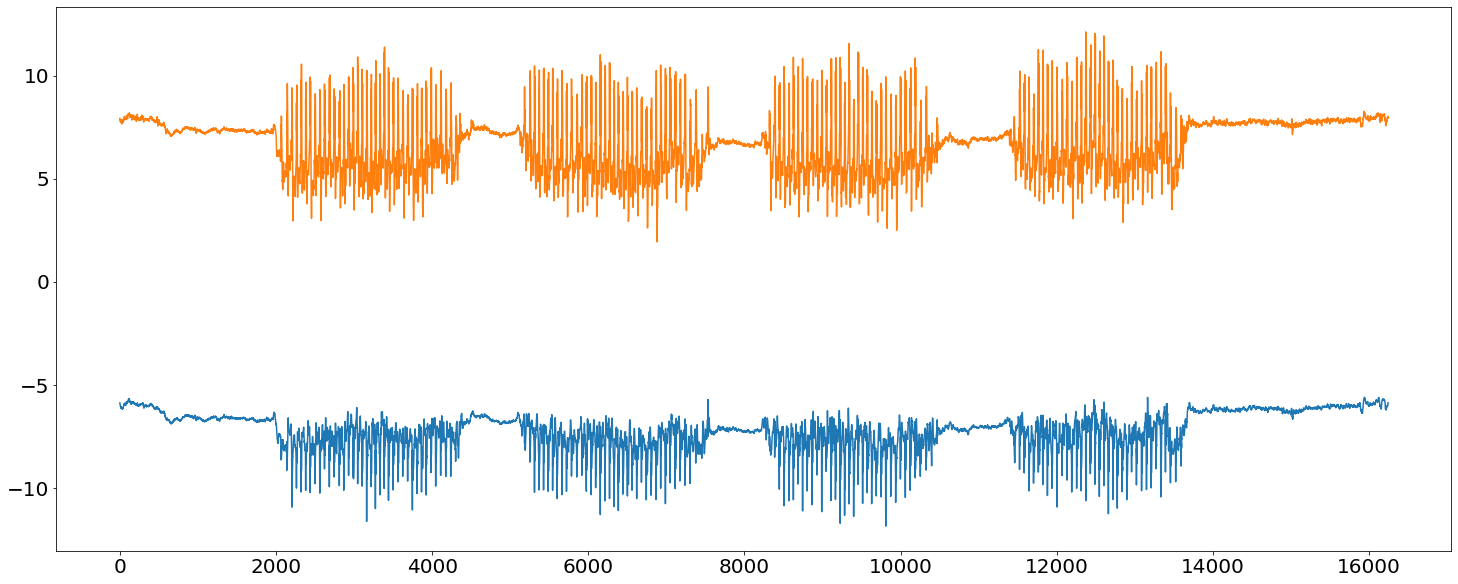

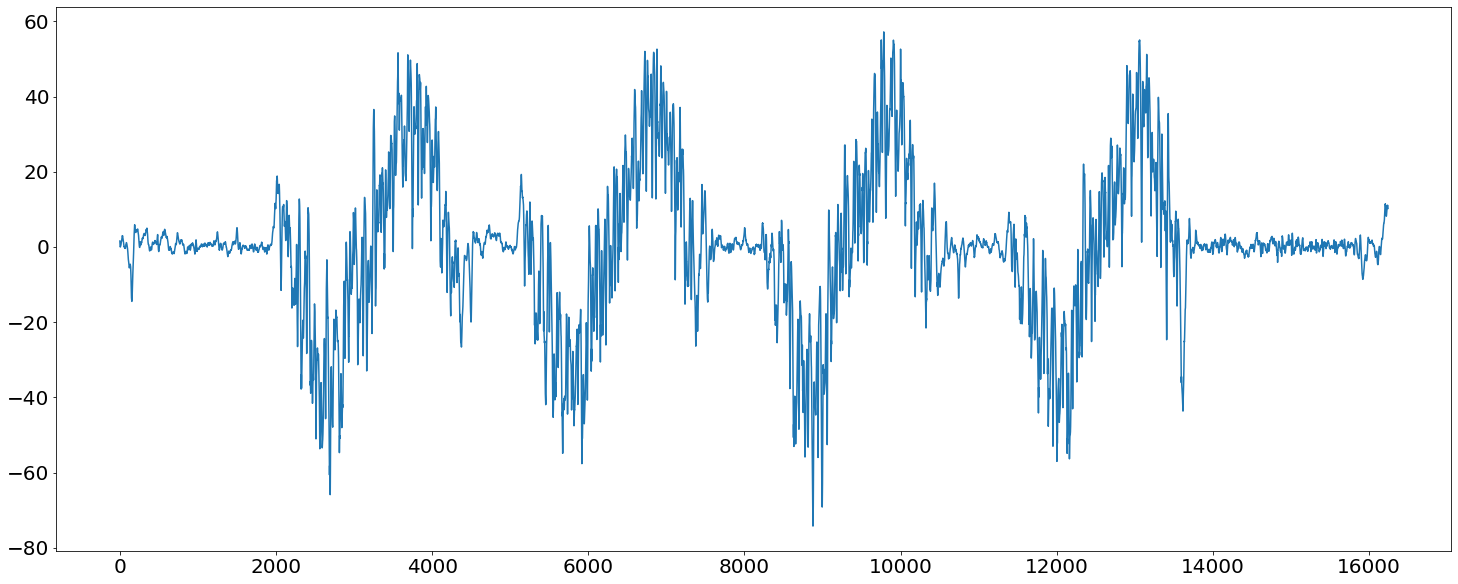

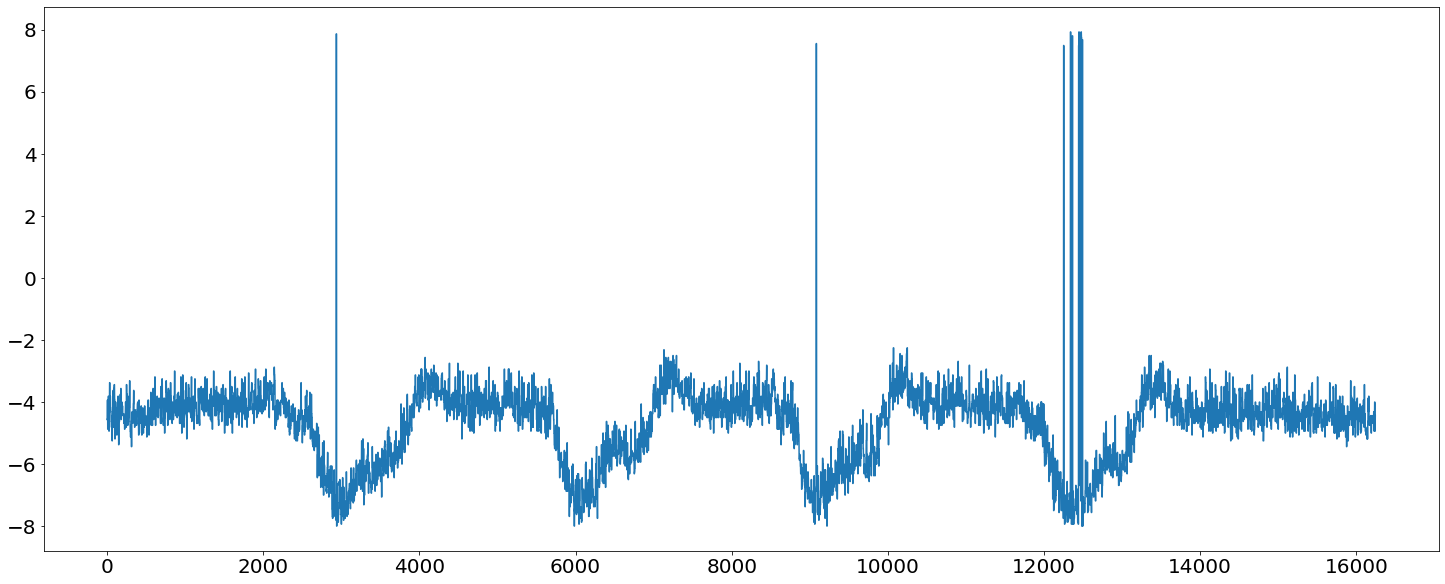

In [43]:
plt.figure(figsize=(25,10))

plt.plot(anna[0]['acce_x'], label = 'Barefoot')
plt.plot(anna[0]['acce_y'])
#plt.plot(anna[0]['acce_z'])

plt.figure(figsize=(25,10))
plt.plot(anna[0]['gyro_x'], label = 'Barefoot')
#plt.plot(anna[0]['gyro_y'])

plt.figure(figsize=(25,10))
plt.plot(anna[0]['magne_x'], label = 'Barefoot')




## Standard Deviation

In [44]:
#Calculating the standard deviation for each column expect the first one ('Date/Time')
def calculating_standard_deviation(df_list):
    std_dev_list = []
    for df in df_list:
        std_dev = df.iloc[:, 1:].std()
        std_dev_list.append(std_dev)
    return std_dev_list

## Plots

statistical averaging:
-boxplot to determine
red line helps determine to find the average of each column
there seems to be a lot of outliers above and below the whiskers

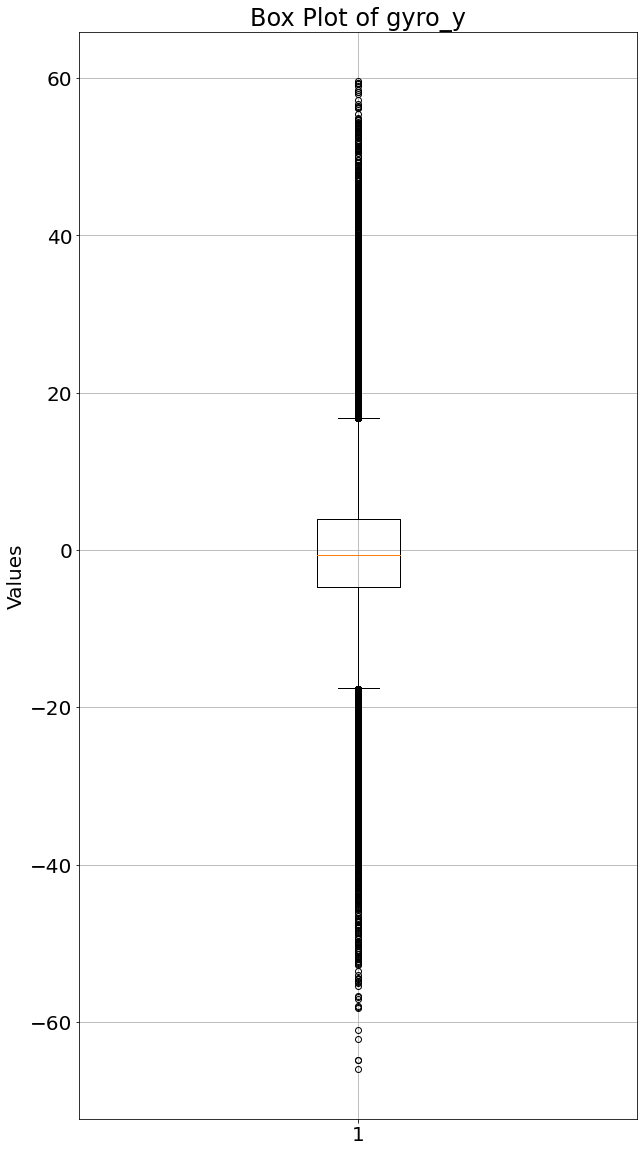

In [45]:
column_to_plot = 'gyro_y'

plt.figure(figsize=(10,20))
plt.boxplot(anna[0][column_to_plot])
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel('Values')
plt.grid(True)
plt.show()


histogram plot to determine:
    - the distribution of data
    - central tendency and spread
    - outliers and anomalies

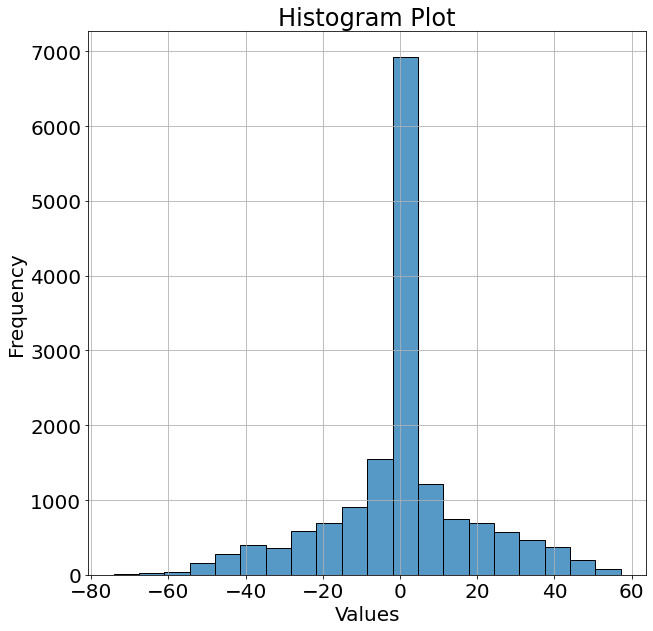

In [46]:
plt.figure(figsize=(10, 10))  # Set the figure size
sns.histplot(data=anna[0], x='gyro_x', kde=False, bins=20)  # kde=False to exclude the kernel density estimate
plt.title('Histogram Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
